### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### Necessary libraries

In [429]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler

# To impute missing values
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Reading the dataset

In [430]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [431]:
path="drive/My Drive/data_courses_AI_ML/boosting/credit_card_users _churn_prediction/BankChurners.csv"

In [432]:
df=pd.read_csv(path)

### Data overview

In [433]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [434]:
print(f'the data has {df.shape[0]} rows and {df.shape[1]} columns')

the data has 10127 rows and 21 columns


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- The data contains missing values, particularly in the education and  marital status
-  The income column is categorical and will be handled separately later

In [436]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

we confirm the missing data in education level and marital satatus columns

In [437]:
df.duplicated().sum()

0

no duplicated points

In [438]:
for col in df.columns:
  print(f'{col} has {df[col].nunique()} unique values')
  #print(f'{df[col].select_dtypes(include=np.number).nlargest()}\n')
  print('--------------------')


CLIENTNUM has 10127 unique values
--------------------
Attrition_Flag has 2 unique values
--------------------
Customer_Age has 45 unique values
--------------------
Gender has 2 unique values
--------------------
Dependent_count has 6 unique values
--------------------
Education_Level has 6 unique values
--------------------
Marital_Status has 3 unique values
--------------------
Income_Category has 6 unique values
--------------------
Card_Category has 4 unique values
--------------------
Months_on_book has 44 unique values
--------------------
Total_Relationship_Count has 6 unique values
--------------------
Months_Inactive_12_mon has 7 unique values
--------------------
Contacts_Count_12_mon has 7 unique values
--------------------
Credit_Limit has 6205 unique values
--------------------
Total_Revolving_Bal has 1974 unique values
--------------------
Avg_Open_To_Buy has 6813 unique values
--------------------
Total_Amt_Chng_Q4_Q1 has 1158 unique values
--------------------
Total_Tr

### Exploratory Data Analysis EDA

In [439]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [440]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

In [441]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

-  The minimum customer age is 26 and the maximum is 73.
- The average open-to-buy (Avg_Open_To_Buy) has a minimum of 3 and a maximum of nearly  35,000. However, the median is around 4,000, indicating a right-skewed distribution with outliers. This means most customers have an Avg_Open-To-Buy closer to 4,000, but a smaller number have much higher values.
- Some customers have a zero total revolving balance, which suggests they pay their balance in full each month. This is an important feature to analyze further to understand spending habits and credit utilization.
-  Some customers have a zero average utilization ratio (Avg_Utilization_Ratio). This implies they don't utilize their credit card limit at all. This data point warrants further investigation to understand their reasons for not using the credit card.   

In [442]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [443]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [444]:
df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

- the attrition_flag is imbalanced varaible
- the most frequent customer gender's are females

In [445]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

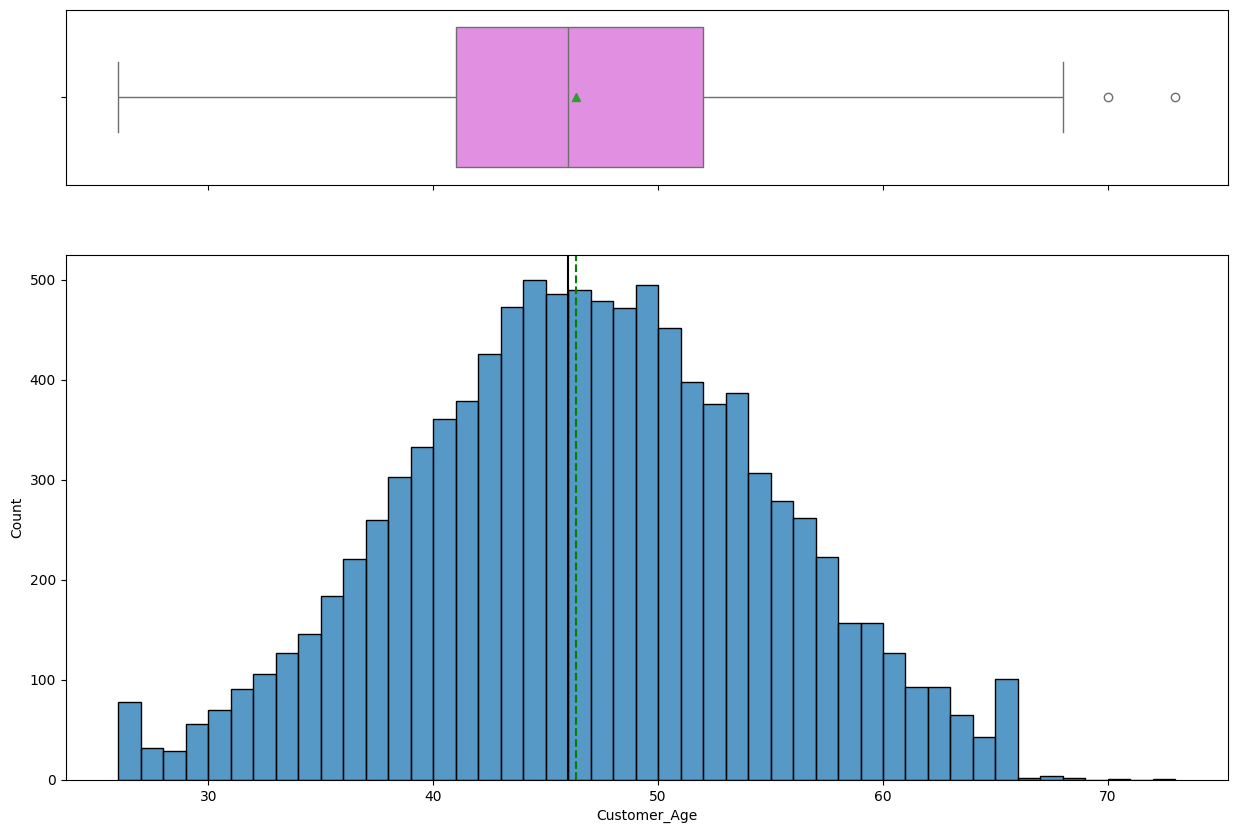

In [446]:
histogram_boxplot(df, 'Customer_Age')

In [447]:
df['Customer_Age'].describe()

count   10127.000
mean       46.326
std         8.017
min        26.000
25%        41.000
50%        46.000
75%        52.000
max        73.000
Name: Customer_Age, dtype: float64

- The age of our customers is normally distributed.
- The minimum age is 26 years and the maximum age is 73 years.
- There are two data points that may be considered outliers.
- The mean and median age are both 46 years old.
- Note: We do not have any customers under 26 years old.

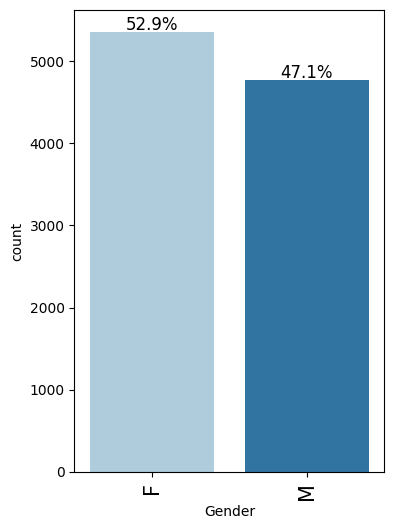

In [448]:
labeled_barplot(df, 'Gender', perc=True)

Females represent a slightly higher proportion of the customers than males

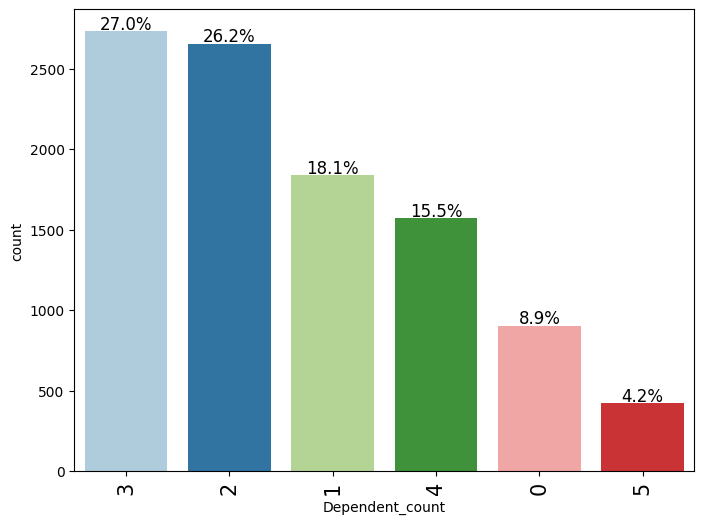

In [449]:
labeled_barplot(df, 'Dependent_count', perc=True)

- 27.0% of customers have 3 dependents.
- 26.2% of customers have 2 dependents.
- 18.1% of customers have 1 dependent.
- 15.5% of customers have 4 dependents.
- 4.2% of customers have 5 dependents.
- 8.9% of customers have no dependents.

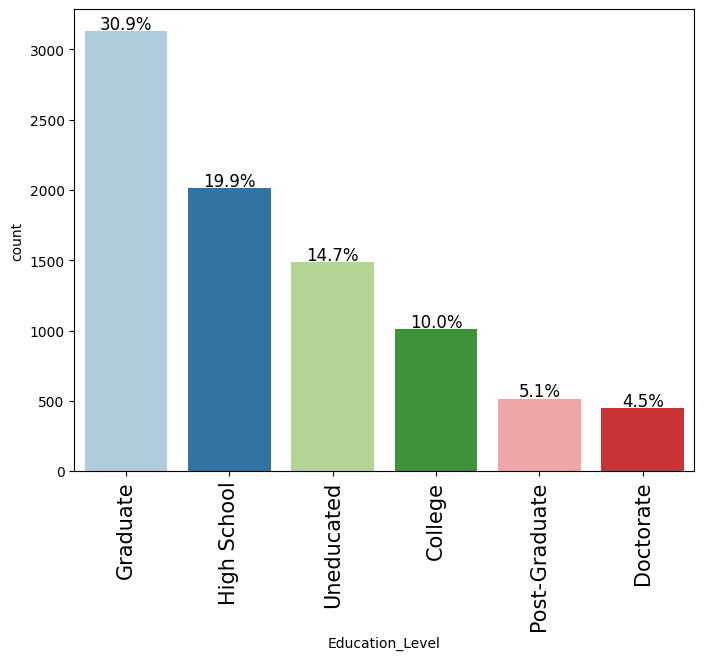

In [450]:
labeled_barplot(df, 'Education_Level', perc=True)

- 30.9% of customers are graduates, representing the third-largest customers
- 19.9% have only high scoll

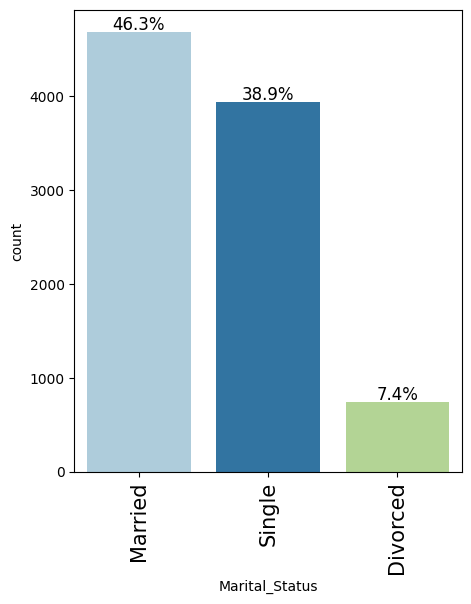

In [451]:
labeled_barplot(df, 'Marital_Status', perc=True)

Considering marital status, almost half (46.3%) of the customers are married. Single customers make up 38.9% of the population, and the remaining customers are divorced.

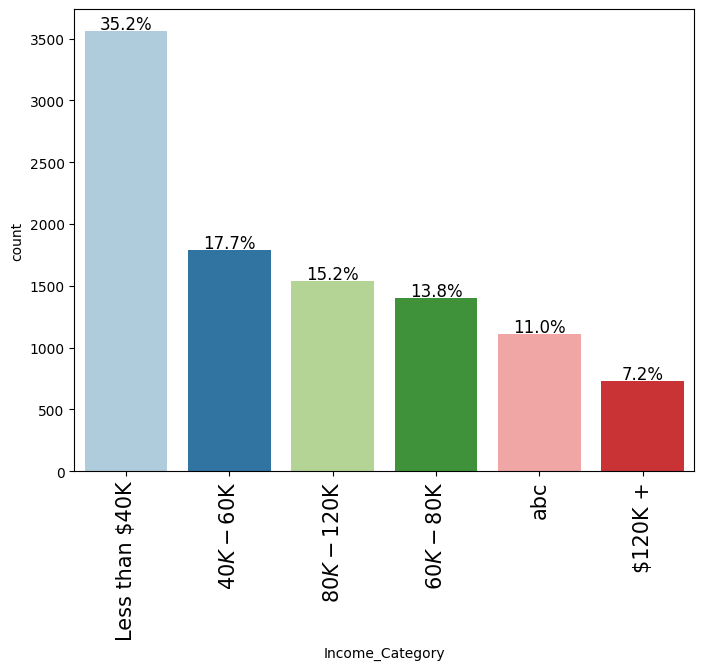

In [452]:
labeled_barplot(df, 'Income_Category', perc=True)

- 35.2% of cutomers have an income less than 40k a year
- 7.2% make make 120k a year
- 11% of customers' annual income is unknown

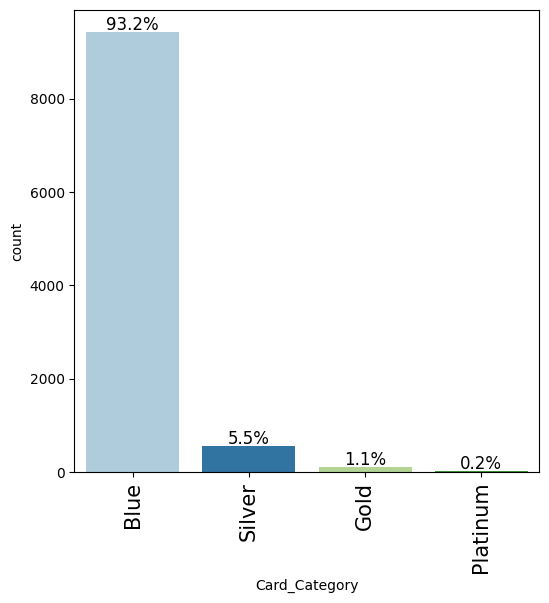

In [453]:
labeled_barplot(df, 'Card_Category', perc=True)

The majority of customers (93.2%) have a blue card, while fewer customers(0.2%) have a platinum card

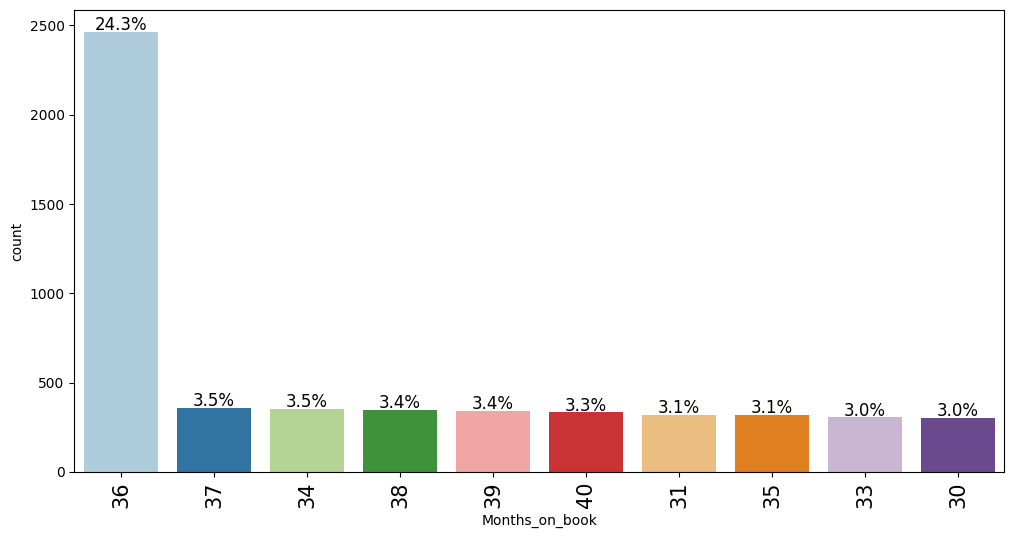

In [454]:
labeled_barplot(df, 'Months_on_book', perc=True,n=10)

In [455]:
df.Months_on_book.value_counts()

Months_on_book
36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: count, dtype: int64

- 24.3% of card has 3 years wish is 36 months
- the oldest credit card has 56 months

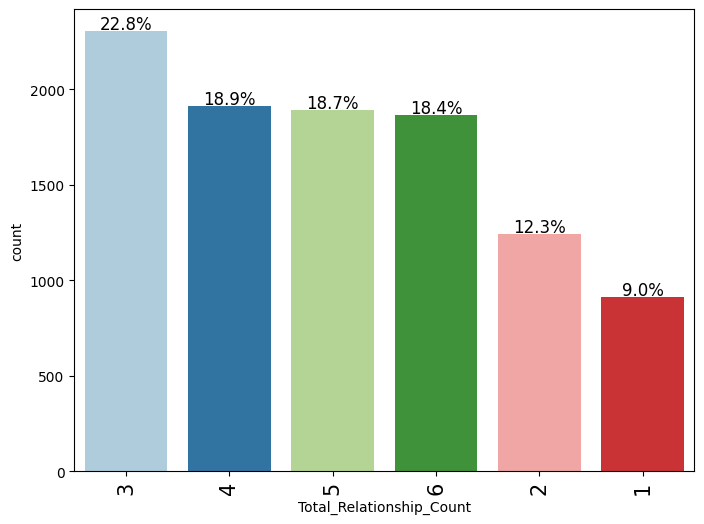

In [456]:
labeled_barplot(df, 'Total_Relationship_Count', perc=True)

- 22.8% of customers has 3 products
- almost 18% have 4 , 5 or 6 products
- 9% have only one product

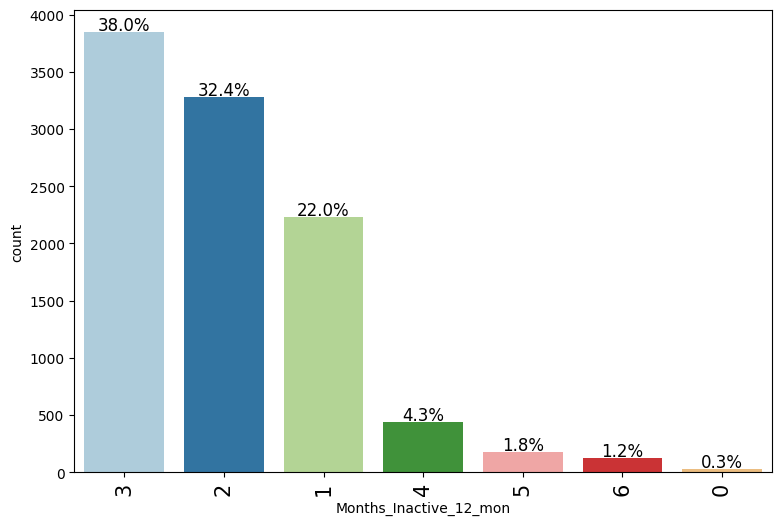

In [457]:
labeled_barplot(df, 'Months_Inactive_12_mon', perc=True)

in the last 12 months :       
- 38% of cards are inavtive for 3 months
- 32.4% are inactive for 2 months
- 22% are recently inactive , 1 month
- 1.2% are inactive for half a years


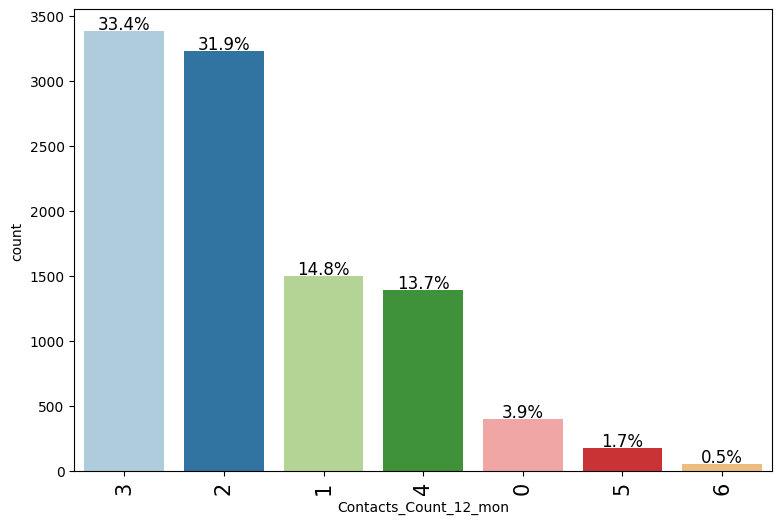

In [458]:
labeled_barplot(df, 'Contacts_Count_12_mon', perc=True)

in the last 12 months there are :       
- 33.4% contact the bank three times
- almost 32% contact the bank two times
- almost 14$ make a contact with the bank 4 times
- only 0.5%  contact the bank 6 times and 1.7% 5 times

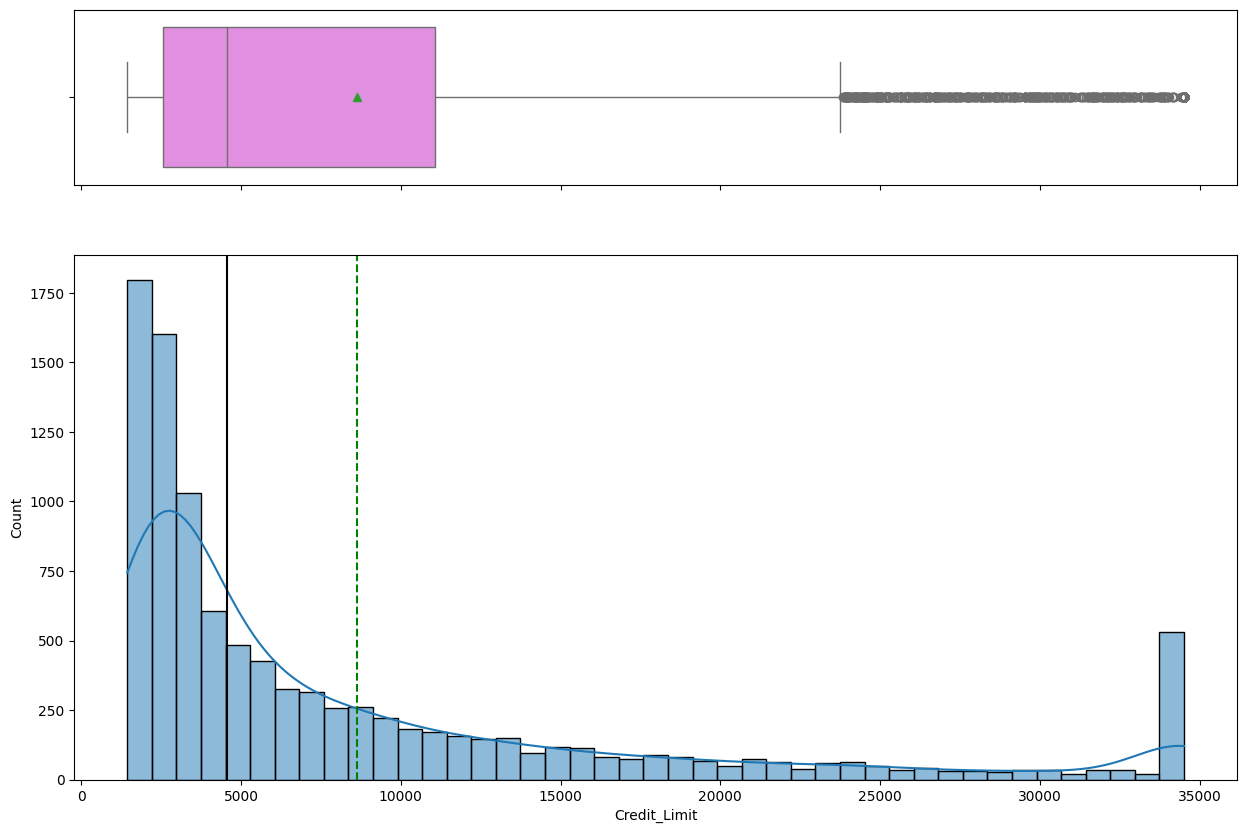

In [459]:
histogram_boxplot(df, 'Credit_Limit', kde=True)

- The credit limit is right-skewed.
- The median is around 5000, while the mean is almost 9000.
- The distribution exhibits a lot of outliers.
- The credit card limit of $34,000 occurs more than 600 times.

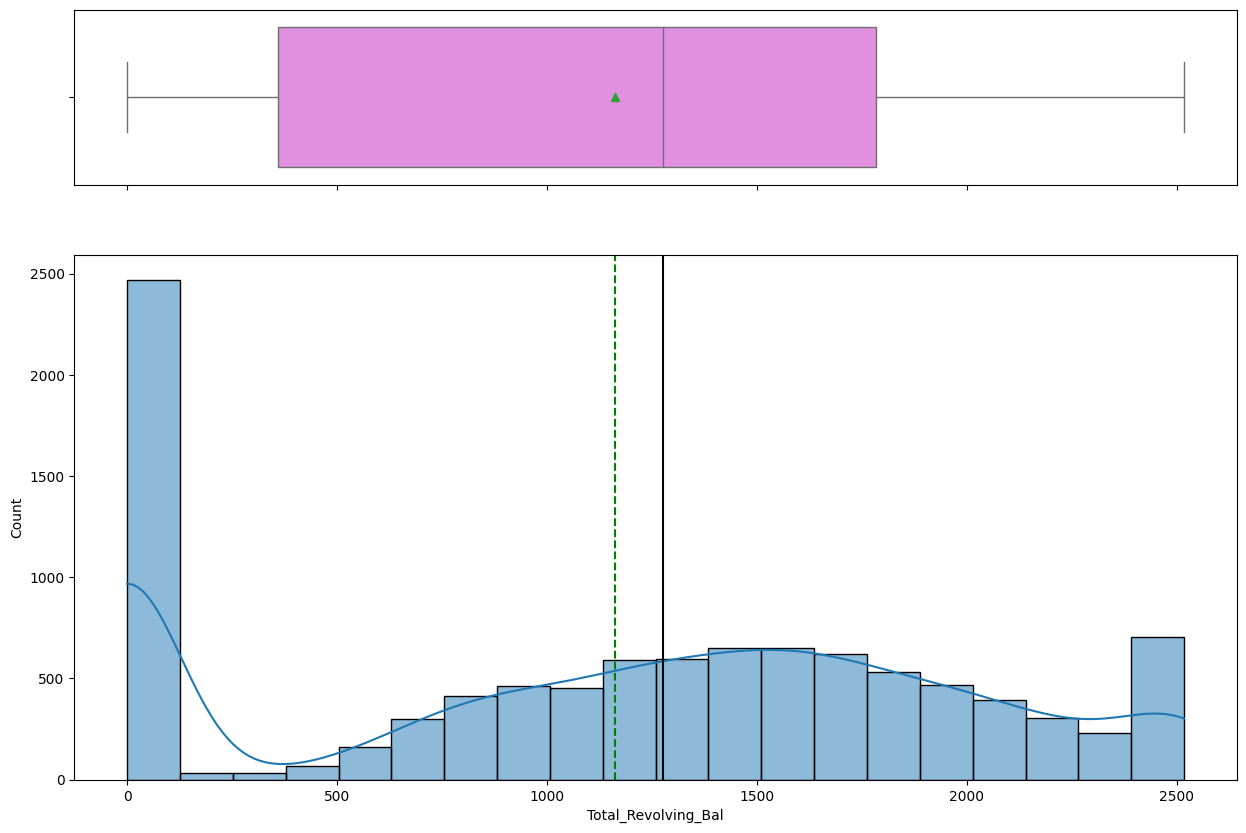

In [460]:
histogram_boxplot(df, 'Total_Revolving_Bal', kde=True)

In [461]:
df.Total_Revolving_Bal.describe()

count   10127.000
mean     1162.814
std       814.987
min         0.000
25%       359.000
50%      1276.000
75%      1784.000
max      2517.000
Name: Total_Revolving_Bal, dtype: float64

- the null total revolving balance count almost 2500
- the customer who carries 2500 as a total revolving balance count almost 800
- the mean of the total revolving balance is almost 1200 and the median is almost 1300
- if we exclude the min and the max we could say that the 'flat' distribution and large large variation or Std equal to 814

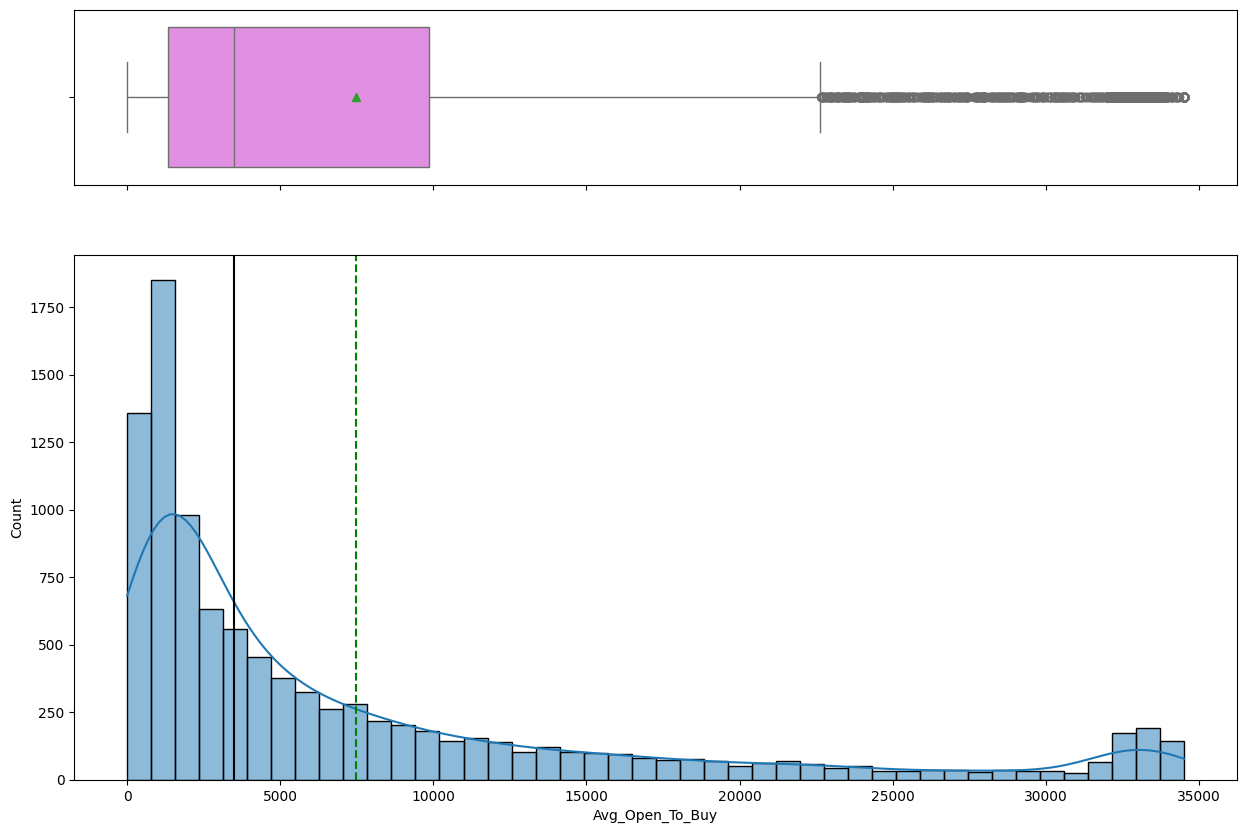

In [462]:
histogram_boxplot(df, 'Avg_Open_To_Buy', kde=True)

- the average open to buy is right skewed
- there is alot of outliers in this distribution

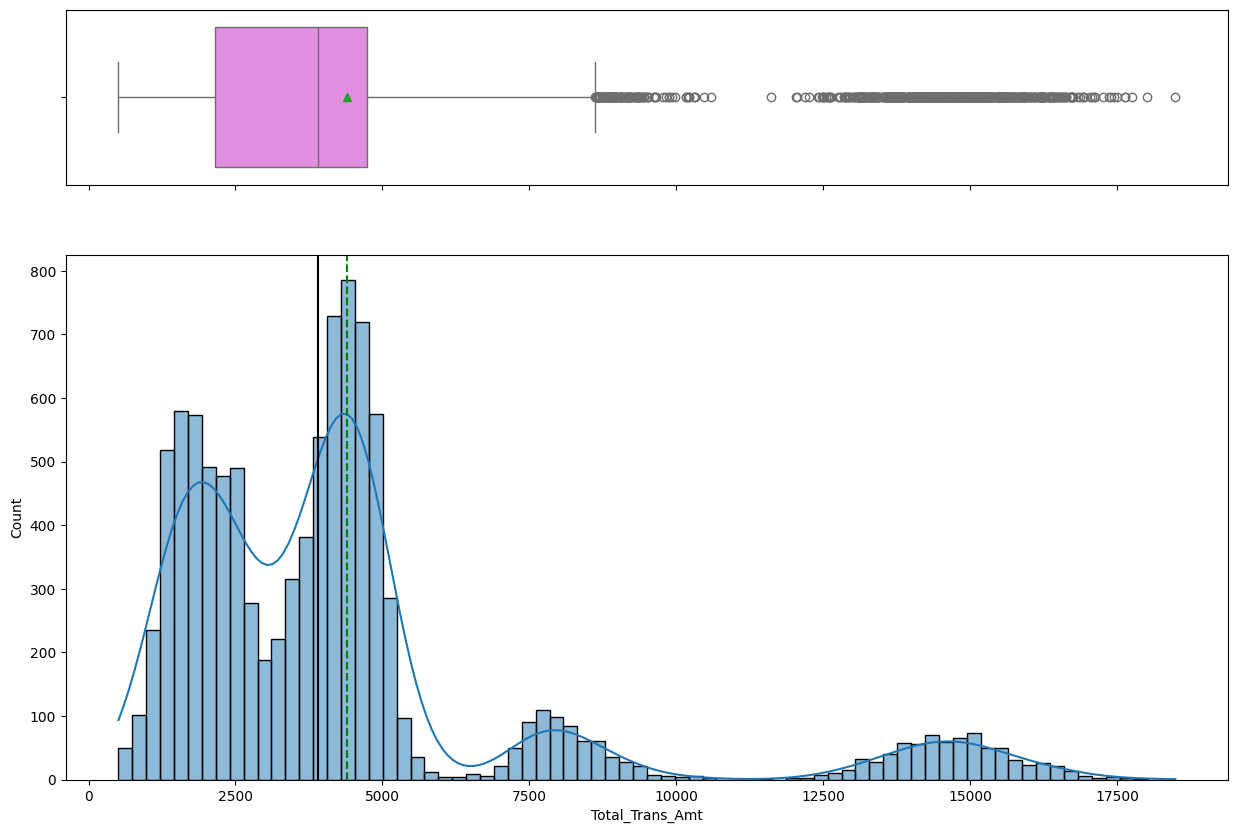

In [463]:
histogram_boxplot(df, 'Total_Trans_Amt', kde=True)

In [464]:
df.Total_Trans_Amt.describe()

count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64

- the distribution of the total transaction amount in the last 12 months doesn't have any particular shape
- the mean is 4404 and the median is almost 3900
- there is much more outliers as the boxplot shows

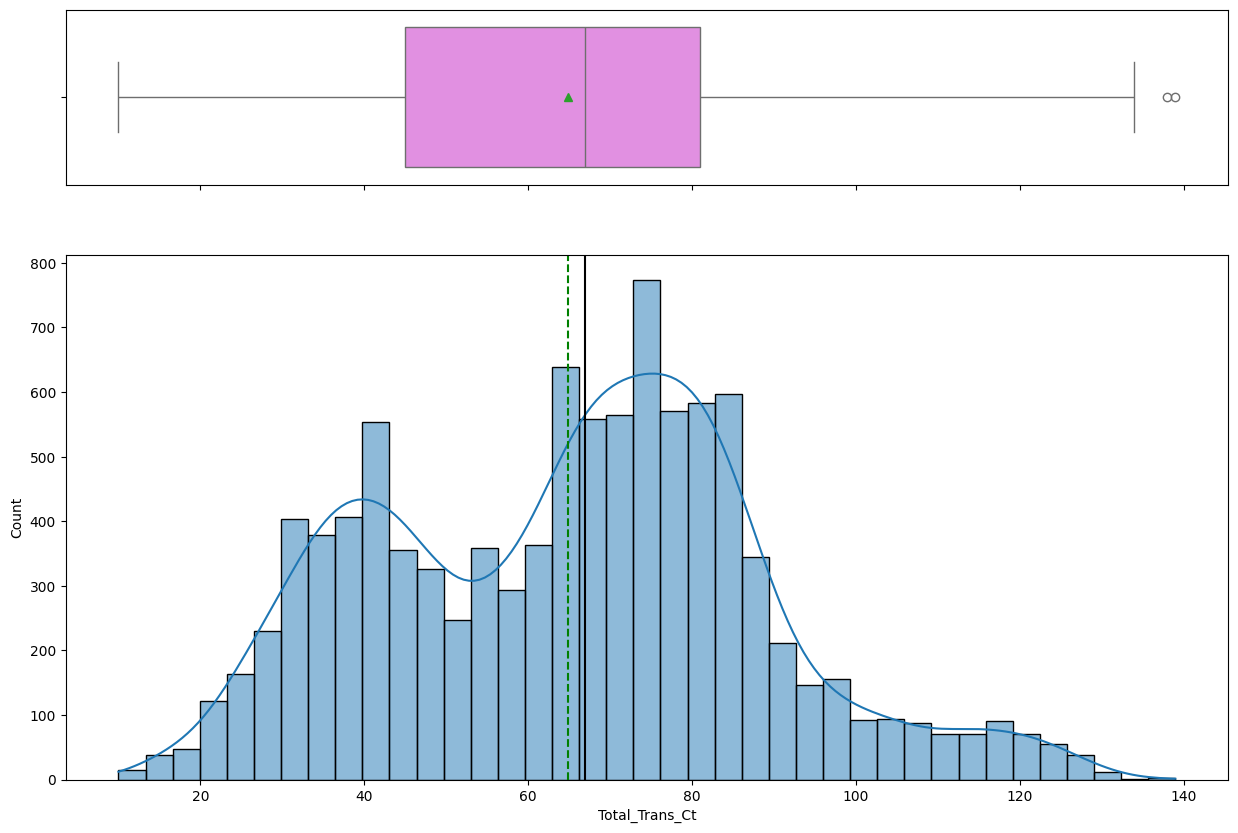

In [465]:
histogram_boxplot(df, 'Total_Trans_Ct', kde=True)

- we could say fairly that the distribition of the total transactions count is normal since the mean is close to the median
- two point are considered as ouliers

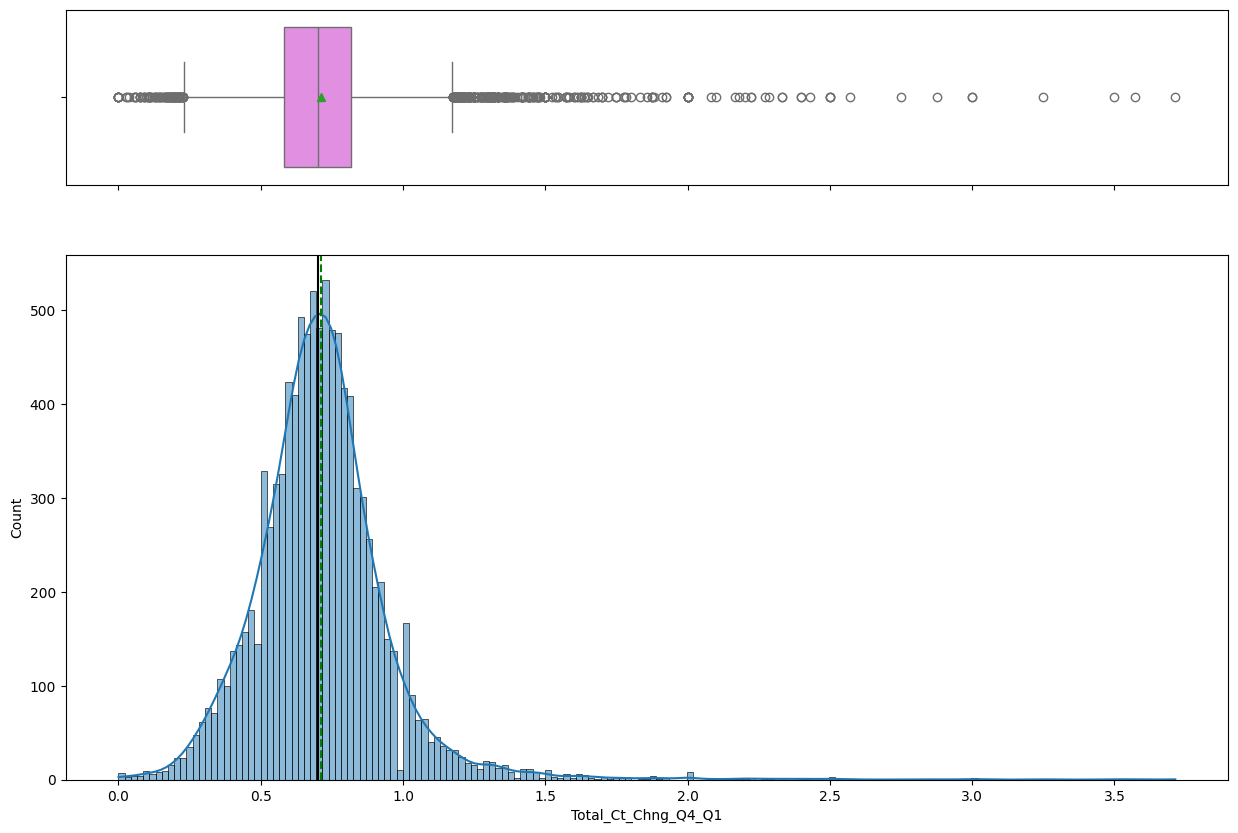

In [466]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1', kde=True)

- the ditribution is normal
- The distribution exhibits outliers that fall outside the range of the box plot.


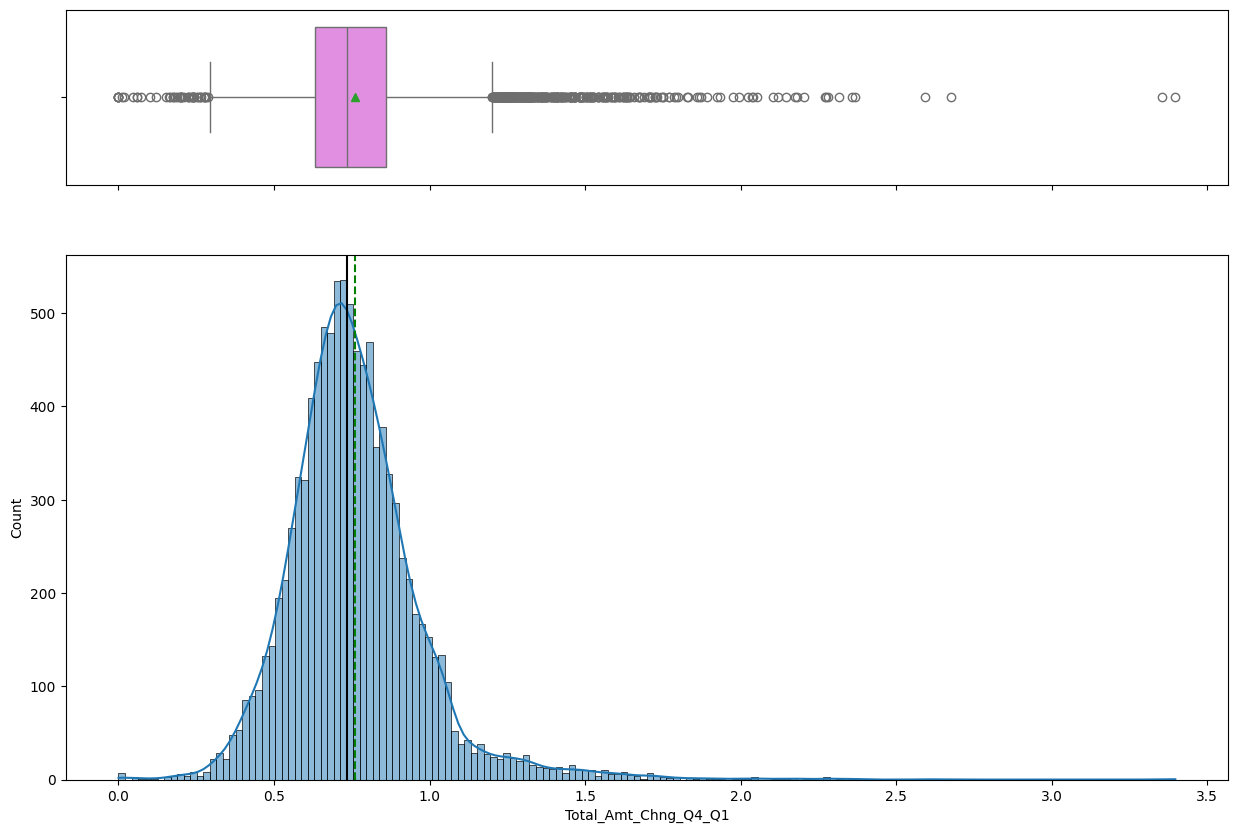

In [467]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1', kde=True)

the total amount transaction in the 4th and 1st period of the year follows the total count transaction , thier ditributions have the same caracteristiques

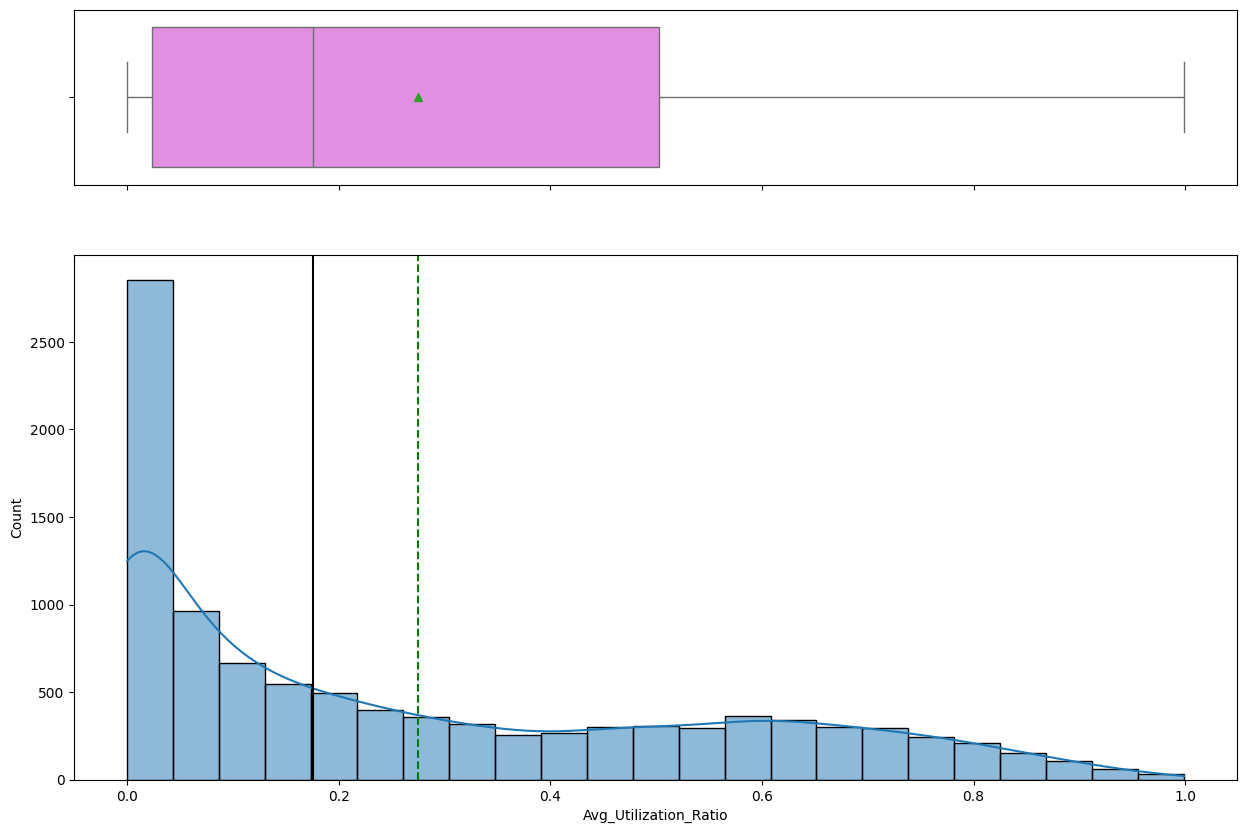

In [468]:
histogram_boxplot(df, 'Avg_Utilization_Ratio', kde=True)

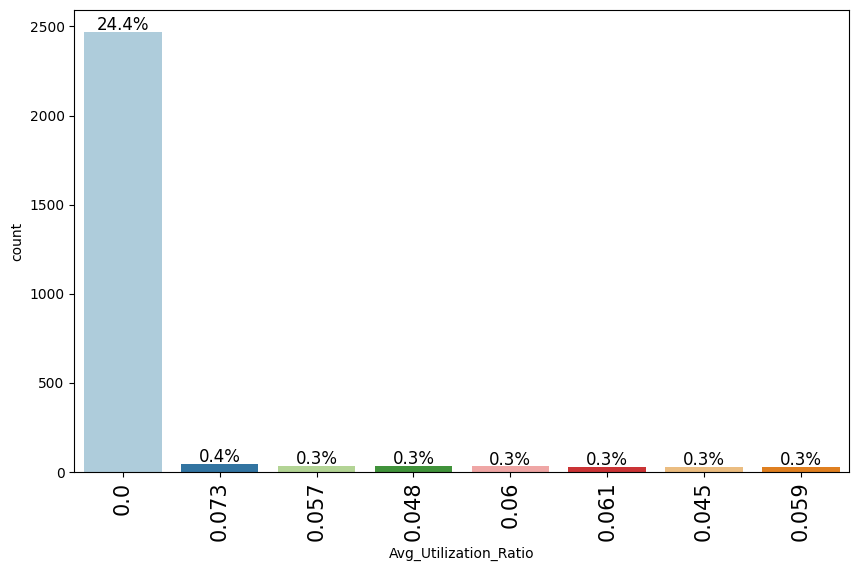

In [469]:
labeled_barplot(df, 'Avg_Utilization_Ratio', perc=True,n=8)

- almost 25% of the cutomers doesn't spend their credit
- the distribution is right skewed

### bivariate Analysis

In [470]:
df_num=df.select_dtypes(include=np.number)

<Axes: >

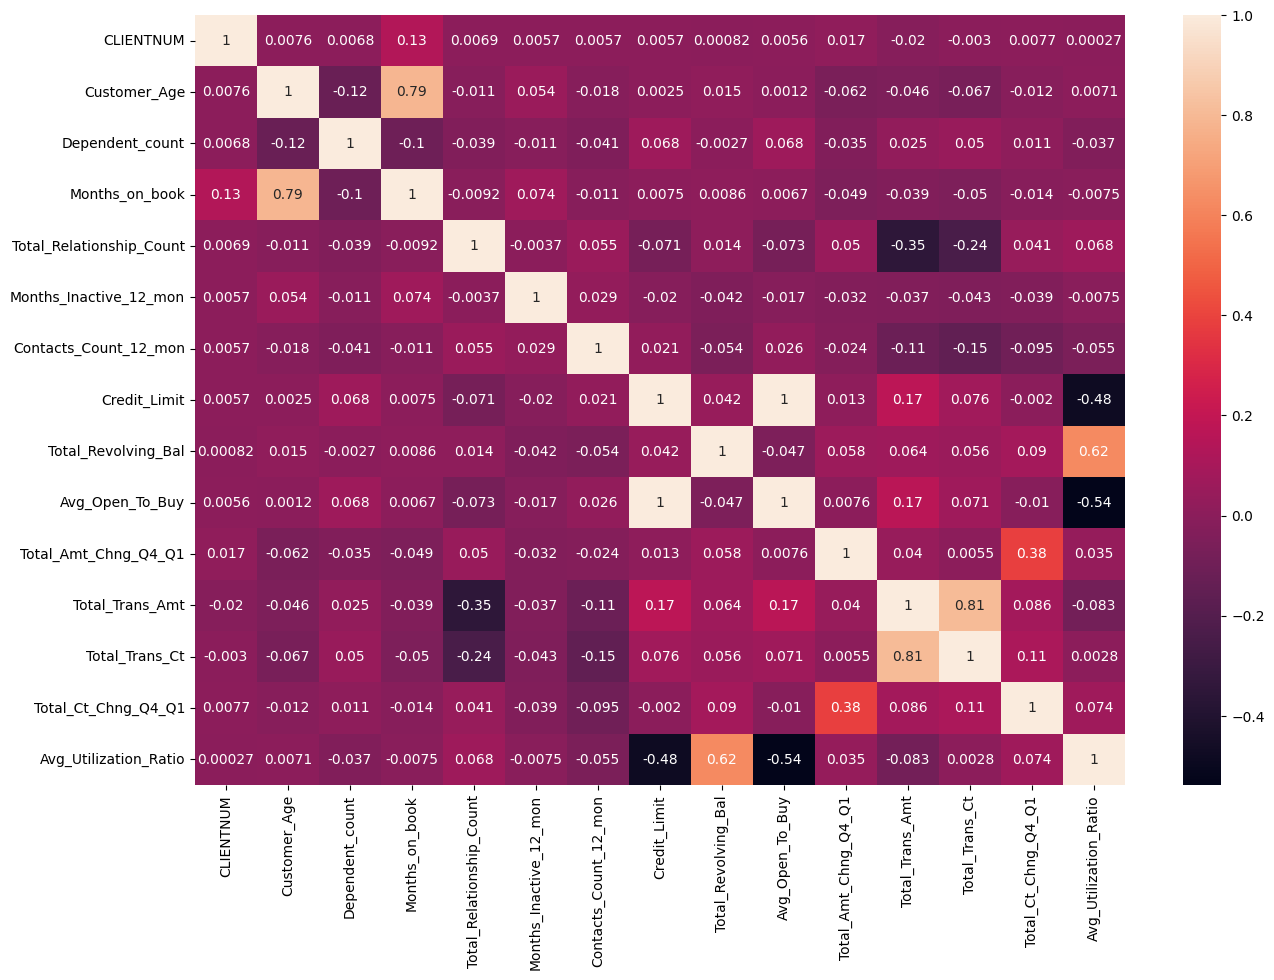

In [471]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)

- Strong positive correlation between the months on book and the customer's age.
- Strong positive correlation between the Avg_utilisation_ratio and the total_revolving_balance.
- Strong negative correlation between the Avg_utilisation_ratio and the avg_opento_buy.
- Strong positive correlation between the total_trans_amt (total transaction amount) and the total_trans_ct (total transaction count). This aligns with intuition.
- Negative correlation between the total_relationship_count and both the total transaction count and total transaction amount.

In [472]:
#plt.figure(figsize=(25,15))
#sns.pairplot(df_num, diag_kind='kde')#,hue='Attrition_Flag'

<Axes: xlabel='Months_on_book', ylabel='Customer_Age'>

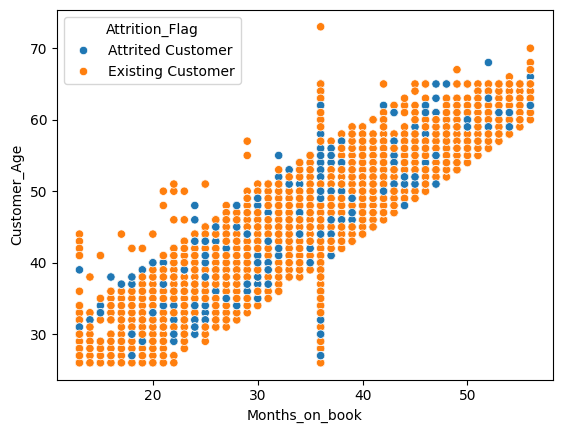

In [473]:
sns.scatterplot(x='Months_on_book',y='Customer_Age',hue='Attrition_Flag',data=df)

This scatter plot confirms our previous observation of a positive correlation between age and months on book, and the attrited cutomers are distributed within the graph with no clear pattern

<Axes: xlabel='Total_Revolving_Bal', ylabel='Avg_Utilization_Ratio'>

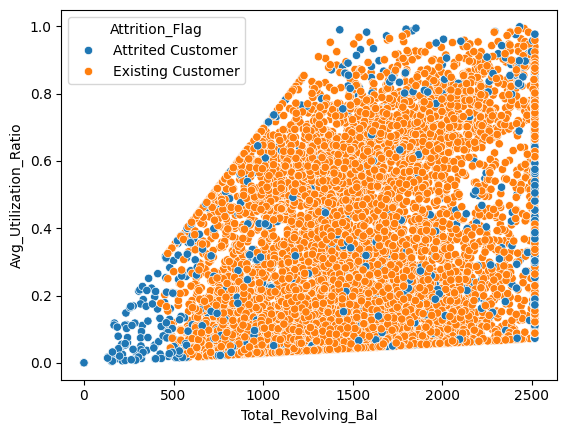

In [474]:
sns.scatterplot(x='Total_Revolving_Bal',y='Avg_Utilization_Ratio',hue='Attrition_Flag',data=df)

In [475]:
df_filtered = df[df['Total_Revolving_Bal'] > 2500]
df_filtered['Attrition_Flag'].value_counts(normalize=True)


Attrition_Flag
Existing Customer   0.694
Attrited Customer   0.306
Name: proportion, dtype: float64

- Customers with lower balances(less than 500) and utilization ratios (less than 0.4)are more likely to be attrited customers
- We can also observe that 30% of customers with a balance exceeding $2,500 carried over month-to-month and a utilization ratio below 0.6 are attributed customers.
- Some customers with high utilization ratios are likely attrited

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Avg_Utilization_Ratio'>

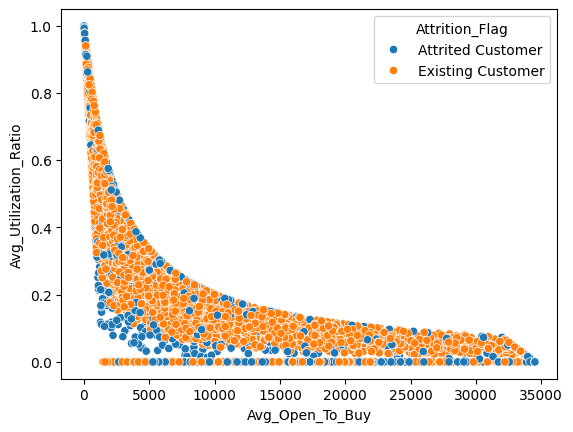

In [476]:
sns.scatterplot(x='Avg_Open_To_Buy',y='Avg_Utilization_Ratio',hue='Attrition_Flag',data=df)

In [477]:
df_fil = df[(df['Avg_Open_To_Buy'] < 10000) & (df['Avg_Utilization_Ratio'] < 0.4)]
df_fil['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer   0.780
Attrited Customer   0.220
Name: proportion, dtype: float64

In [478]:
df_fil1=df[df['Avg_Utilization_Ratio']==0]
df_fil1.groupby('Attrition_Flag')[()].value_counts()

Attrition_Flag   
Attrited Customer    0
Existing Customer    0
Name: count, dtype: int64

- 22% of customers that both have a lower average utilization ratio(< 0.4) and a lower average open-to-buy(< 10000) are attrited customers.
- We observed that customers with a zero Avg_utilization_ratio are more likely to be attrited. Specifically, 893 customers with a zero ratio have churned, compared to 1,511 customers who are still active.

<Axes: xlabel='Marital_Status', ylabel='Education_Level'>

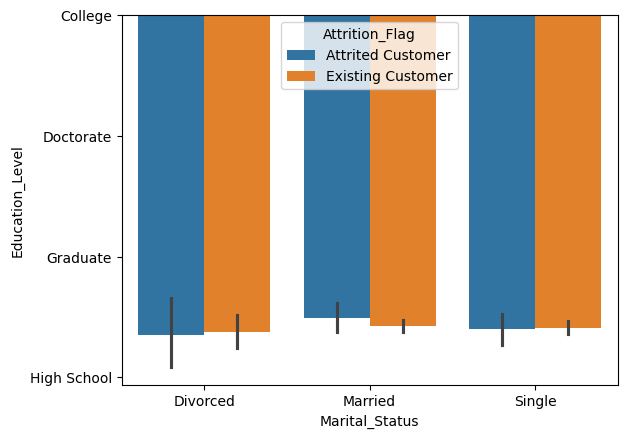

In [479]:
sns.barplot(data=df,y='Education_Level' ,x='Marital_Status',hue='Attrition_Flag')

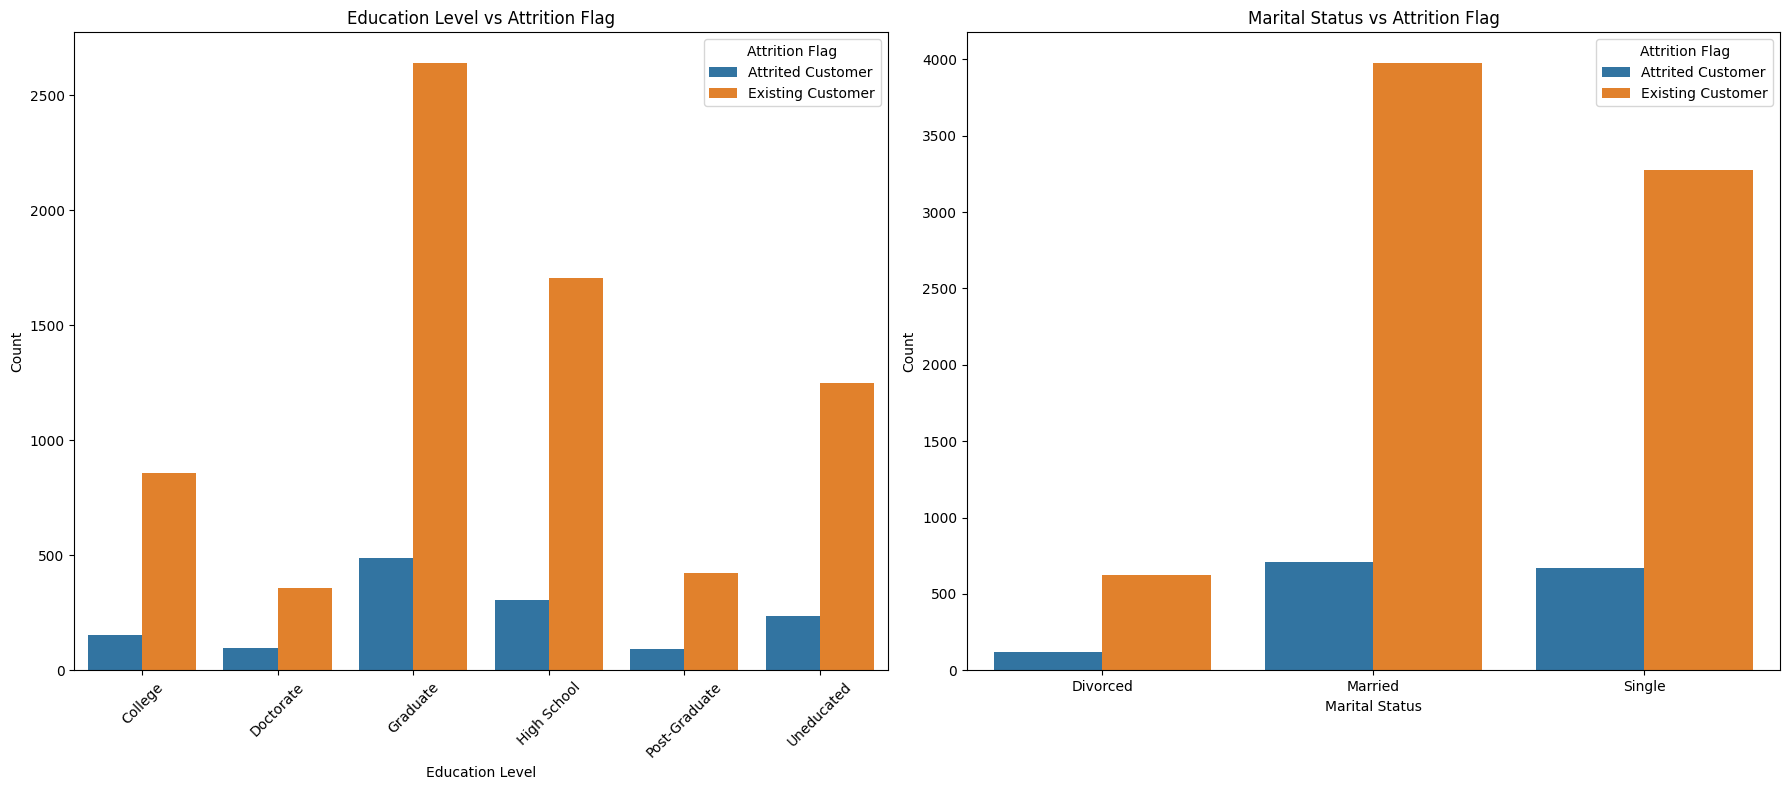

In [480]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
# Plot for Education_Level
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag', ax=axes[0])
axes[0].set_title('Education Level vs Attrition Flag')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')
axes[0].legend(title='Attrition Flag')
axes[0].tick_params(axis='x', rotation=45)
# Plot for Marital_Status
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag', ax=axes[1])
axes[1].set_title('Marital Status vs Attrition Flag')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Attrition Flag')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()


In [481]:
df.groupby('Attrition_Flag')['Marital_Status'].value_counts()

Attrition_Flag     Marital_Status
Attrited Customer  Married            709
                   Single             668
                   Divorced           121
Existing Customer  Married           3978
                   Single            3275
                   Divorced           627
Name: count, dtype: int64

In [482]:
df.groupby('Attrition_Flag')[['Education_Level','Marital_Status']].value_counts(normalize=True)

Attrition_Flag     Education_Level  Marital_Status
Attrited Customer  Graduate         Married          0.169
                                    Single           0.161
                   High School      Married          0.109
                                    Single           0.094
                   Uneducated       Single           0.081
                                    Married          0.074
                   College          Married          0.056
                                    Single           0.050
                   Doctorate        Married          0.037
                   Post-Graduate    Married          0.029
                   Graduate         Divorced         0.029
                   Post-Graduate    Single           0.028
                   Doctorate        Single           0.028
                   High School      Divorced         0.018
                   Uneducated       Divorced         0.016
                   College          Divorced         0.009
     

- almost one-quarter (or 25%) of the customers in each marital status group are attrited..
- A significant number of customers who are graduates are at risk of attrition.
-  16% of customers who are both graduates and single are attrited. This is a high percentage for this category.
- note : we have more 1500 are misiing value in education level feature

<Axes: xlabel='Gender', ylabel='Attrition_Flag'>

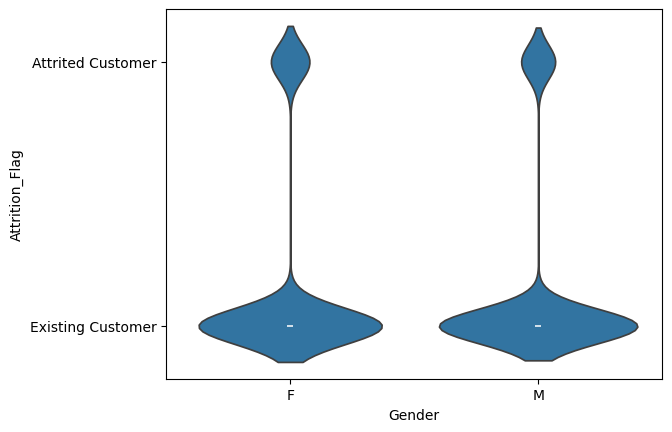

In [483]:
sns.violinplot(data=df,y='Attrition_Flag' ,x='Gender')

the churn of a customer doesn't depend on the gender

In [484]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<Axes: xlabel='Income_Category', ylabel='count'>

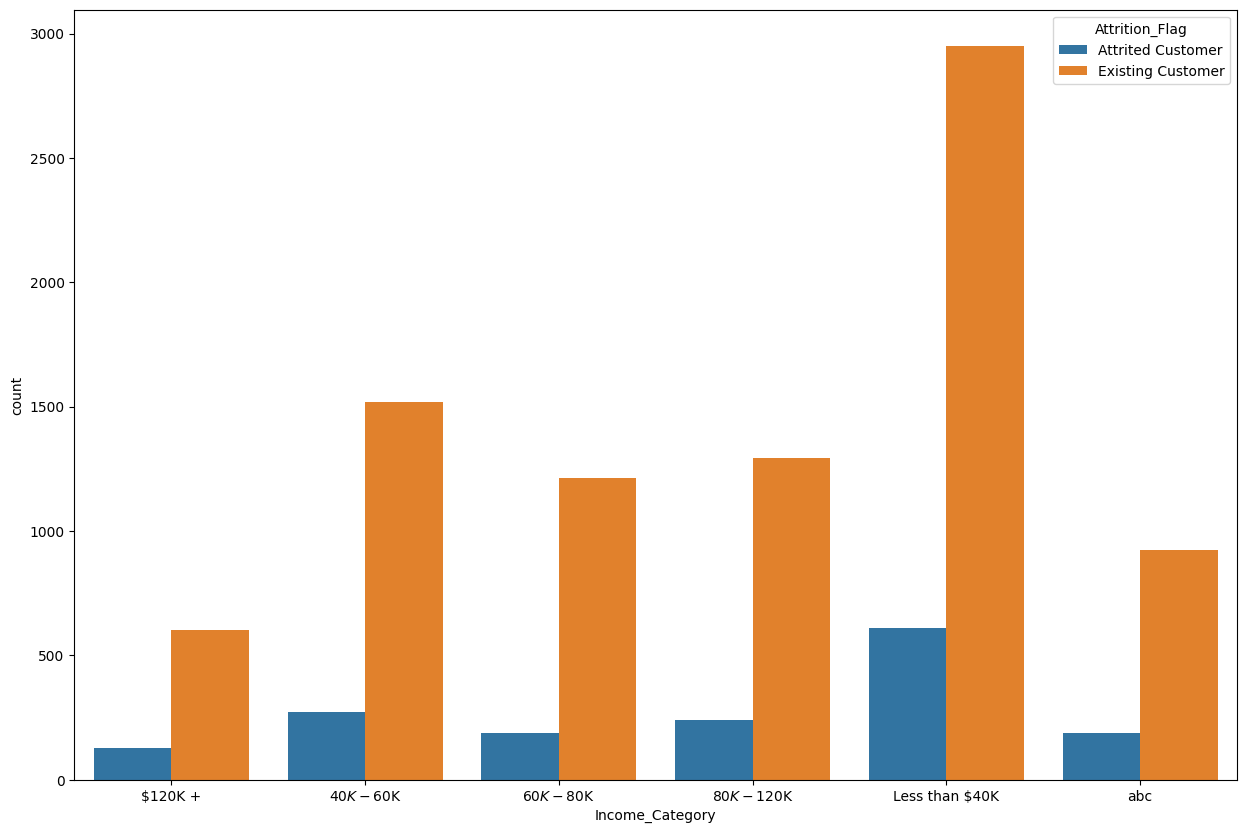

In [485]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Income_Category' ,hue='Attrition_Flag')

In [486]:
df.groupby('Attrition_Flag')['Income_Category'].value_counts()

Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   $80K - $120K        242
                   $60K - $80K         189
                   abc                 187
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   $80K - $120K       1293
                   $60K - $80K        1213
                   abc                 925
                   $120K +             601
Name: count, dtype: int64

- one-quarter of the cutomers that have the income less than 40k are attrited , but also in the income category of 120k+.

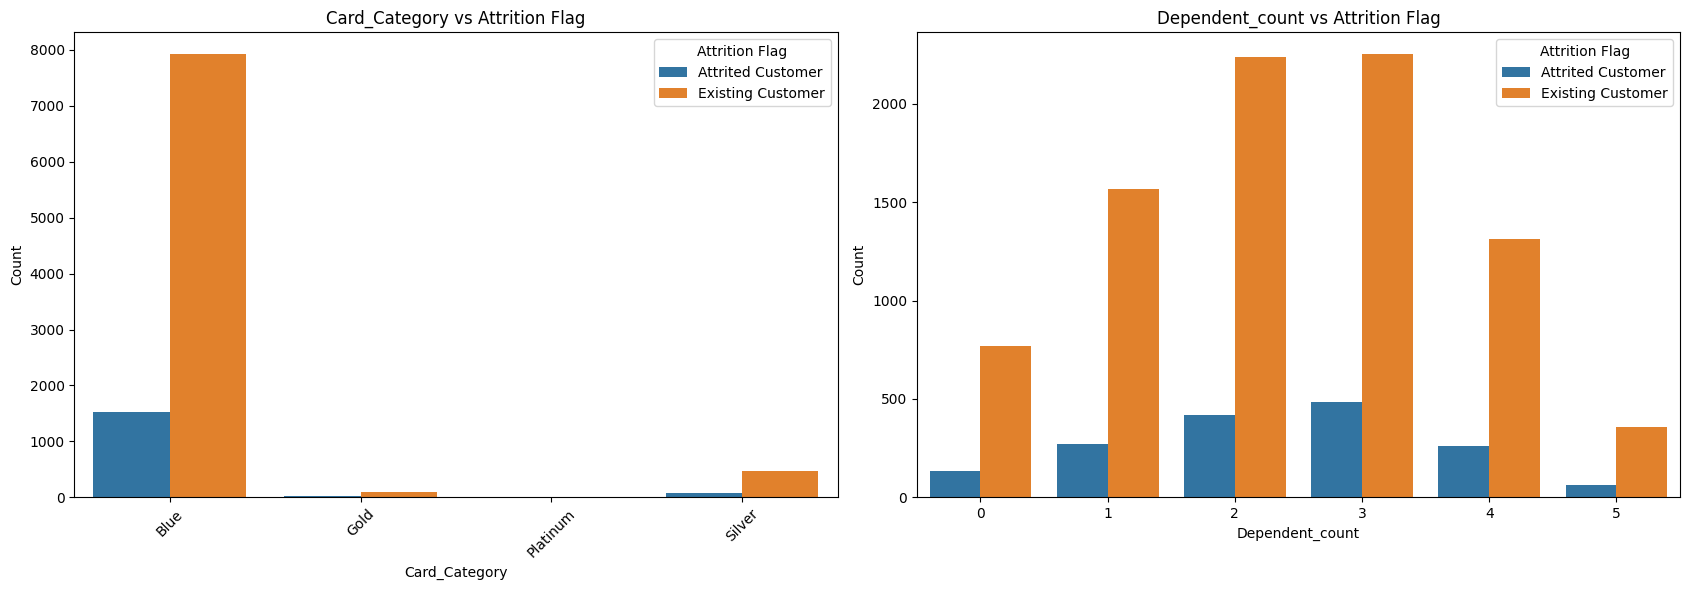

In [487]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
# Plot for Card_Category
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag', ax=axes[0])
axes[0].set_title('Card_Category vs Attrition Flag')
axes[0].set_xlabel('Card_Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Attrition Flag')
axes[0].tick_params(axis='x', rotation=45)
# Plot for Dependent_count
sns.countplot(data=df, x='Dependent_count', hue='Attrition_Flag', ax=axes[1])
axes[1].set_title('Dependent_count vs Attrition Flag')
axes[1].set_xlabel('Dependent_count')
axes[1].set_ylabel('Count')
axes[1].legend(title='Attrition Flag')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

- One-quarter (or 25%) of customers with blue cards are attrited. It's possible they perceive less value compared to holders of cards in other categories.
- One-quarter of customers in dependency categories 2 and 3 are likely attrited.

<Axes: xlabel='Total_Trans_Amt', ylabel='Attrition_Flag'>

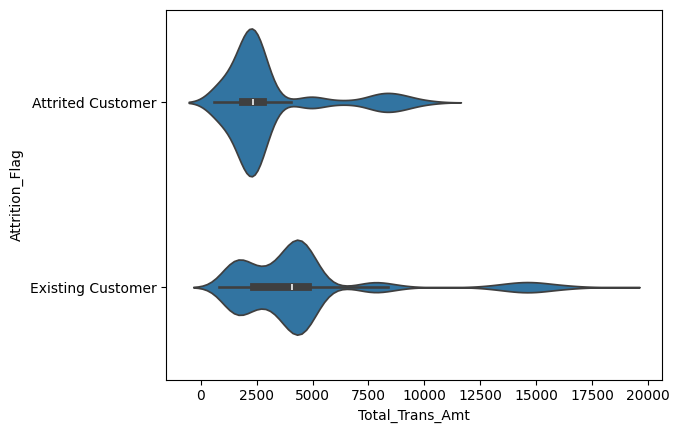

In [488]:
sns.violinplot(x='Total_Trans_Amt',y='Attrition_Flag',data=df)

<Axes: xlabel='Total_Trans_Amt', ylabel='Attrition_Flag'>

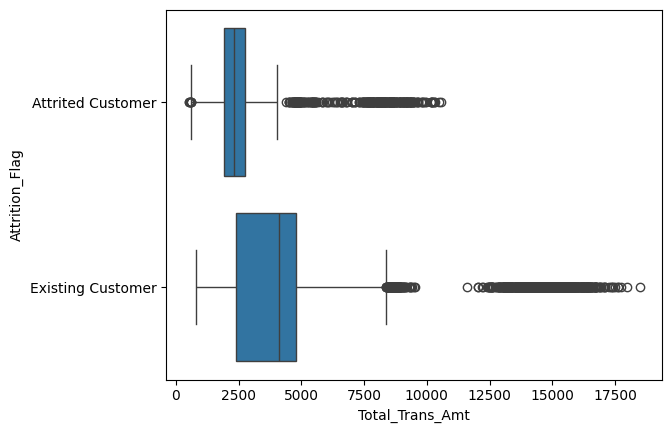

In [489]:
sns.boxplot(x='Total_Trans_Amt',y='Attrition_Flag',data=df)

 Customers who have a total transaction amount of $2,500 in the past year are more likely to churn.

<Axes: xlabel='Total_Revolving_Bal', ylabel='Attrition_Flag'>

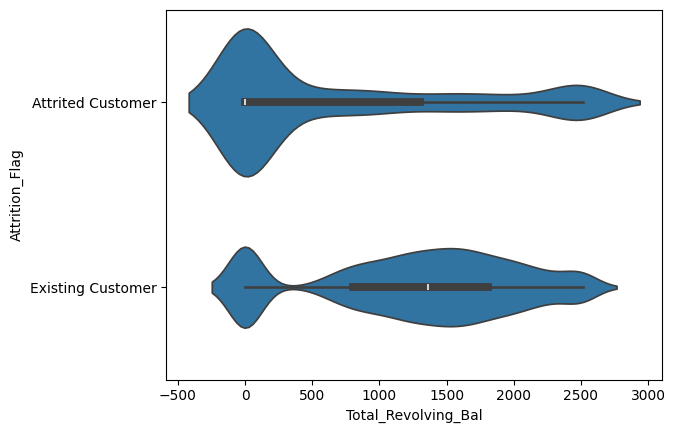

In [490]:
sns.violinplot(x='Total_Revolving_Bal',y='Attrition_Flag',data=df)

- Customers with a zero revolving balance are more likely to churn. This could be because the credit limit is too low for their needs.

In [491]:
df['Credit_Limit'].value_counts()

Credit_Limit
34516.000    508
1438.300     507
9959.000      18
15987.000     18
23981.000     12
            ... 
9183.000       1
29923.000      1
9551.000       1
11558.000      1
10388.000      1
Name: count, Length: 6205, dtype: int64

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Total_Trans_Amt'>

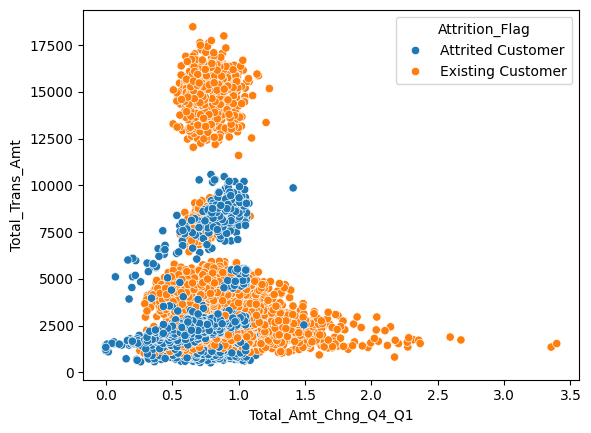

In [492]:
#'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1 #
sns.scatterplot(y='Total_Trans_Amt',x='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',data=df)

In [493]:
df_fil2 = df[(df['Total_Trans_Amt'] < 12000) & (df['Total_Amt_Chng_Q4_Q1'] < 1.1)]
df_fil2['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    7252
Attrited Customer    1618
Name: count, dtype: int64

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Total_Trans_Ct'>

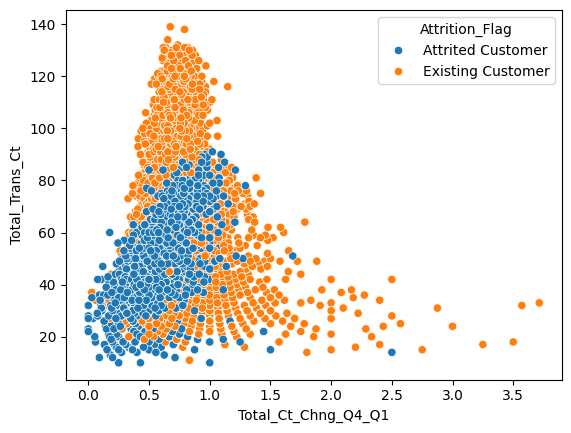

In [494]:
sns.scatterplot(y='Total_Trans_Ct',x='Total_Ct_Chng_Q4_Q1',hue='Attrition_Flag',data=df)

- Customers with a total transaction amount below 12,000 and a ratio of total transaction amount in Q4 to Q1 below 1.2 are at risk of attrition.
- The majority of attrited customers fall within the range of the  total_transaction_count less than 100 and a Q4 to Q1 transaction_count ratio below 1.5.

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

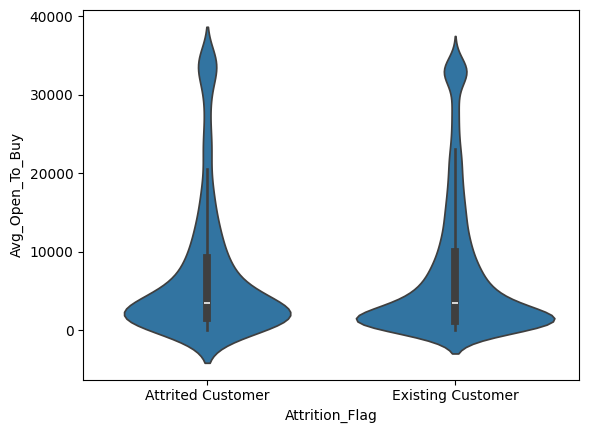

In [495]:
sns.violinplot(y='Avg_Open_To_Buy',x='Attrition_Flag',data=df)

Customers with a low Average Open-to-Buy (Avg_Open_To_Buy) are more likely to churn

<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

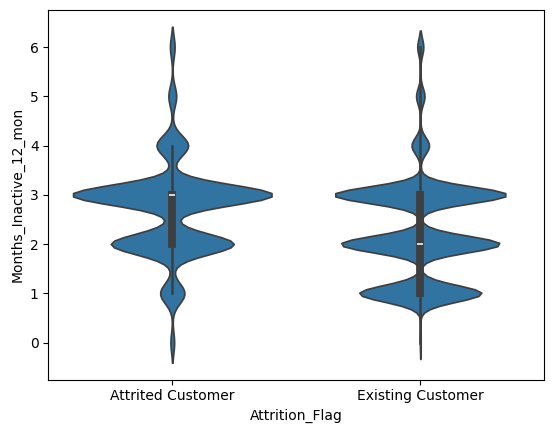

In [496]:
sns.violinplot(y='Months_Inactive_12_mon',x='Attrition_Flag',data=df)

Most attrited customers were inactive for 3 months, with some inactive for 2 months.

<Axes: xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

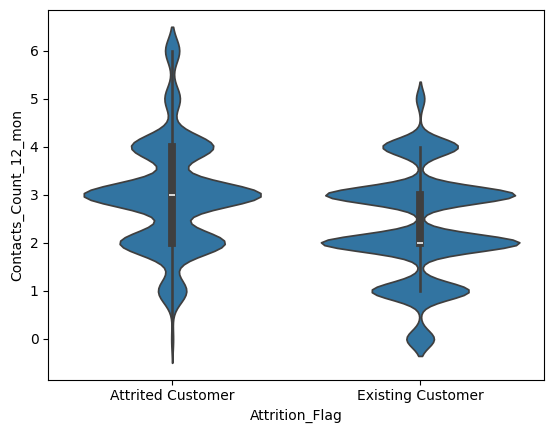

In [497]:
 sns.violinplot(y='Contacts_Count_12_mon',x='Attrition_Flag',data=df)

Most attrited customers contacted the bank an average of 3 times in the last 12 months.

<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

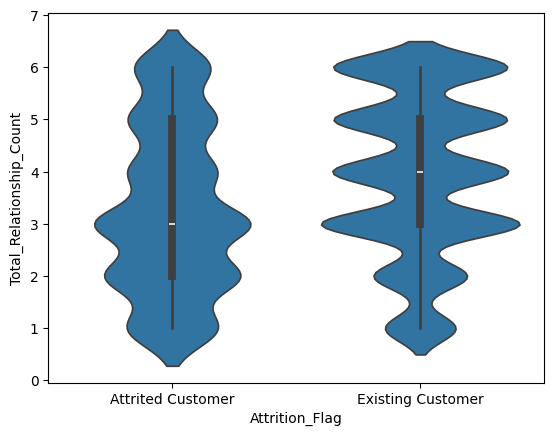

In [498]:
sns.violinplot(y='Total_Relationship_Count',x='Attrition_Flag',data=df)

Customers who hold fewer than 3 cards are more likely to churn

### Conslusion :

## Customer Demographics:

- Age is normally distributed (average 46 years old).
- More females than males (slightly higher proportion).
- Dependency distribution: 27% (3 dependents), 26% (2 dependents), 18% (1 dependent), etc.
- Education: Most customers have a high school diploma or are graduates (missing values present).
- Marital Status: Nearly half are married (46.3%), followed by single (38.9%)(missing values present).
- Income: Majority have income less than $40k (35.2%).

## Credit Card Characteristics:

- Card type: blue cards (93.2%), few platinum cards (0.2%).
- Months on book: Positive correlation with age.
- Number of products: Most have 2-3 products, some with none or more than 4.
- Credit limit: Right-skewed with outliers, median around 5,000.
- Revolving balance: Right-skewed with outliers, median close to mean (1200-1300).
- Total transaction amount (past year): No clear shape, median lower than mean (3900 vs 4404). Outliers present.

## Customer Activity and Attrition:

- Customer inactivity: Most recently inactive for 3 months (38%), followed by 2 months (32.4%).
- Contact with bank: Most contacted the bank 2-3 times (almost 32% & 33.4%) in the past year.

## Attrition patterns:

- Lower balances (< 500) and utilization ratios ( < 0.4) correlate with churn.
- Customers with zero revolving balance are more likely to churn.
- Graduates and single customers with 16% churn rate (high for this group).
- Income extremes (less than $40k and $120k+) show higher churn (25%).
- Blue card holders have 25% churn rate.
- Customers with specific transaction amount and Q4/Q1 ratio ranges are more likely to churn.
- Low Average Open-to-Buy is linked to churn.
- Contacting the bank less frequently might be a churn indicator (average 3 times).
- Holding fewer than 3 cards is associated with higher churn.

## Additional Notes:

Outliers are present in several features (credit limit, revolving balance, transaction amount).

### Recommendation :     
This is a key recommendation based on the previous analysis. However, further analysis may reveal other valuable insights :
- Target marketing campaigns towards specific customer segments at risk of churn (Graduates and single , Customers with low balances, Customers holding fewer than 3 cards ...)
- Analyze customer inactivity and identify reasons for low contact
- Review credit limit settings for specific customer groups

### Data preprocessing

In [499]:
df1=df.copy ()

In [500]:
# checking the missing value again
df1.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [501]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [502]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### split the data

we want to split the dataset before any preprocessing to avoid the data leaking

In [503]:
df1.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

we can tell that the target varaible are imbalanced

In [504]:
X=df1.drop('Attrition_Flag',axis=1)
y=df1['Attrition_Flag']

In [505]:
X.drop('CLIENTNUM',axis=1,inplace=True)

In [506]:
# List of numerical columns to be scaled
X_num_col=X.select_dtypes(include=np.number).columns
# List of non-numerical columns to remain unchanged
X_cat_col = X.select_dtypes(include=['object', 'category']).columns
# Initialize the scaler
scaler = StandardScaler()

# Scale only the numerical columns
data_numerical_scaled = scaler.fit_transform(X[X_num_col])

# Convert the scaled numerical data back to a DataFrame
data_numerical_scaled_df = pd.DataFrame(data_numerical_scaled, columns=X_num_col)

# Combine the scaled numerical data with the non-numerical columns
X_scaled = pd.concat([data_numerical_scaled_df, X[X_cat_col]], axis=1)

X_scaled.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0        -0.165            0.503           0.385                     0.764   
1         0.334            2.043           1.011                     1.407   
2         0.583            0.503           0.009                     0.121   
3        -0.789            1.273          -0.241                    -0.523   
4        -0.789            0.503          -1.869                     0.764   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                  -1.327                  0.492         0.447   
1                  -1.327                 -0.412        -0.041   
2                  -1.327                 -2.220        -0.574   
3                   1.641                 -1.316        -0.585   
4                  -1.327                 -2.220        -0.431   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0               -0.473            0.489                 2.623   
1               -0.367           -0.008                 3.563   
2               -1.427           -0.446                 8.367   
3                1.662           -0.734                 2.943   
4               -1.427           -0.303                 6.456   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0           -0.960          -0.974                3.834   
1           -0.916          -1.357               12.609   
2           -0.741          -1.911                6.808   
3           -0.952          -1.911                6.808   
4           -1.056          -1.570                7.509   

   Avg_Utilization_Ratio Gender Education_Level Marital_Status  \
0                 -0.776      M     High School        Married   
1                 -0.616      F        Graduate         Single   
2                 -0.997      M        Graduate        Married   
3                  1.760      F     High School            NaN   
4                 -0.997      M      Uneducated        Married   

  Income_Category Card_Category  
0     $60K - $80K          Blue  
1  Less than $40K          Blue  
2    $80K - $120K          Blue  
3  Less than $40K          Blue  
4     $60K - $80K          Blue

In [507]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1,stratify=y)

In [508]:
print(X_temp.shape,)
print(X_test.shape)

(8101, 19)
(2026, 19)


In [509]:
# encode the target varaible
y_temp=y_temp.replace({'Existing Customer':1,'Attrited Customer':0})

## Addressing outliers and skewness

In [510]:
X_temp1=X_temp.copy()

In [511]:
columns_to_transform = ['Credit_Limit','Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

In [512]:
for col in columns_to_transform:
  # apply log transformation
  X_temp1[col]= np.log1p(X_temp1[col])
  # first and therd quartiles
  Q1 = X_temp1[col].quantile(0.25)
  Q3 = X_temp1[col].quantile(0.75)
  #Interquartile Range
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  X_temp1[col] = X_temp1[col][(X_temp1[col] >= lower_bound) & (X_temp1[col] <= upper_bound)] #

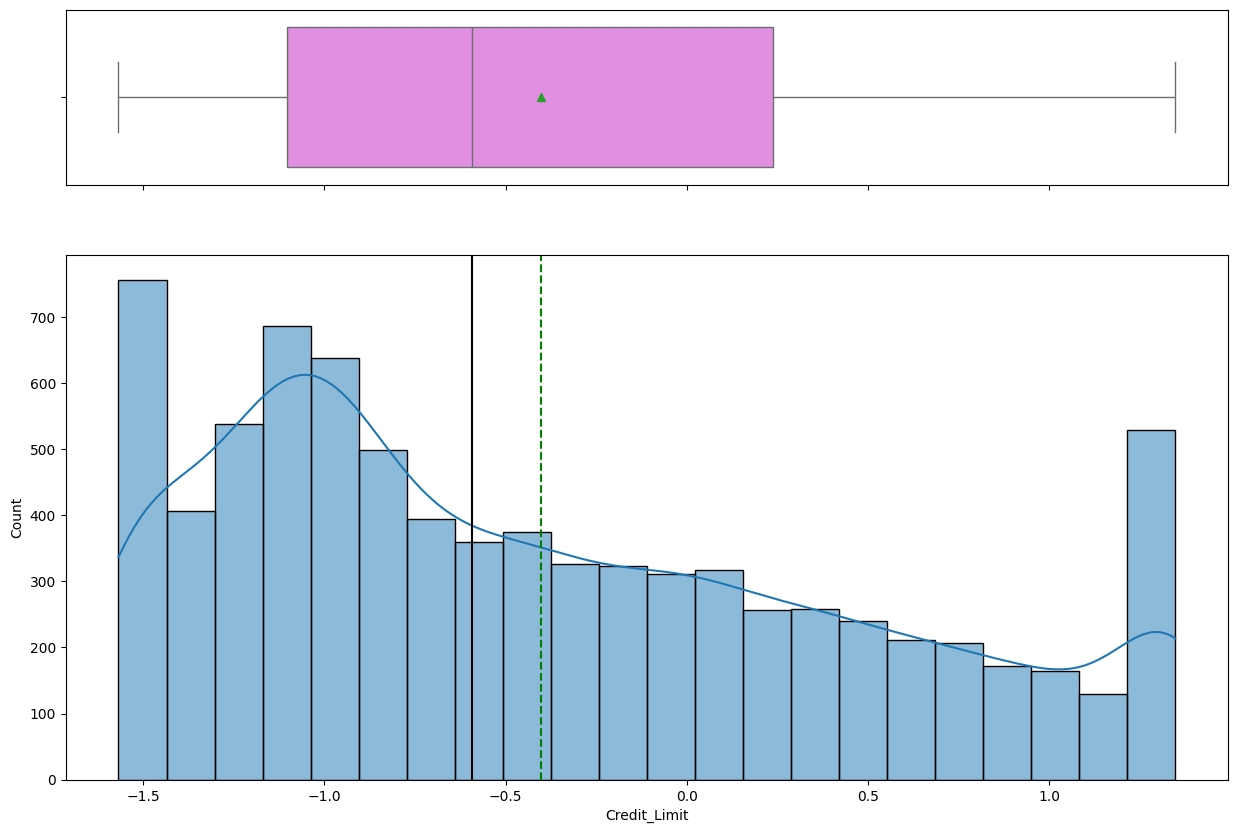

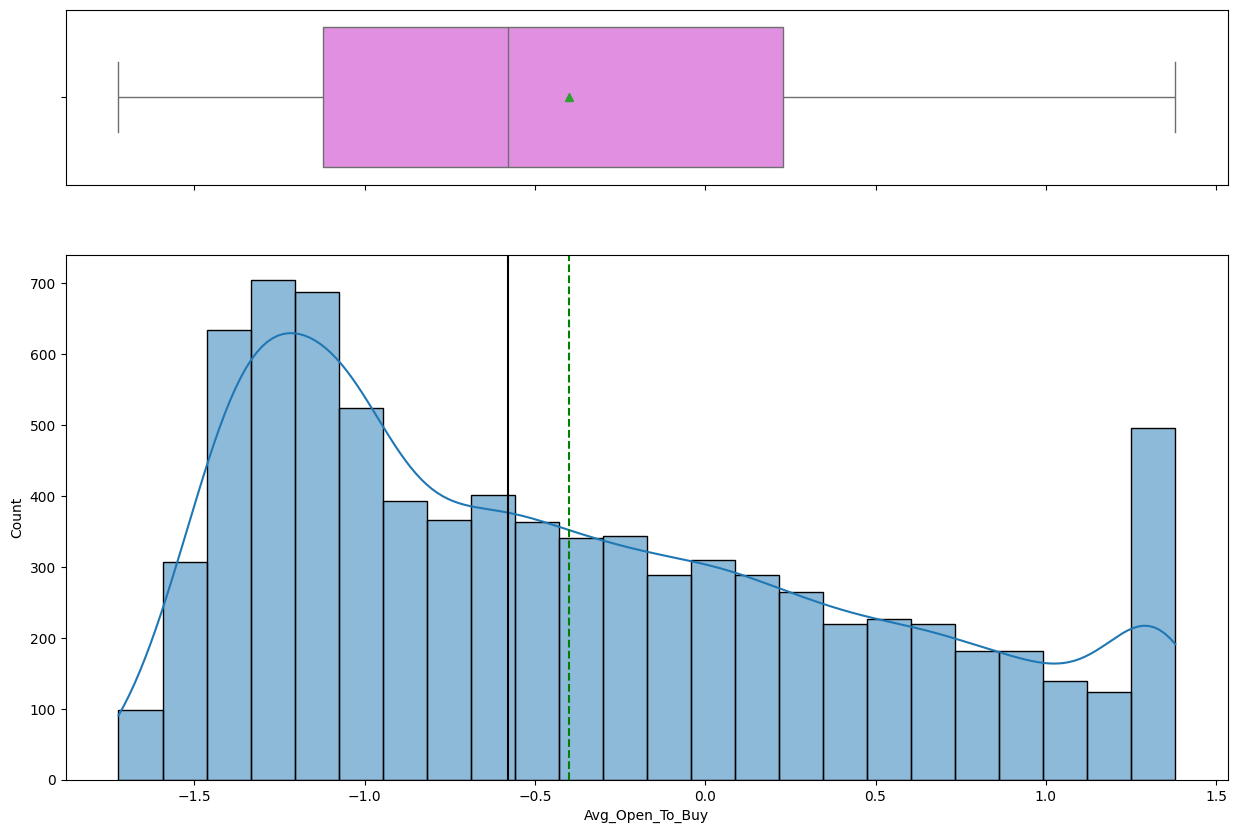

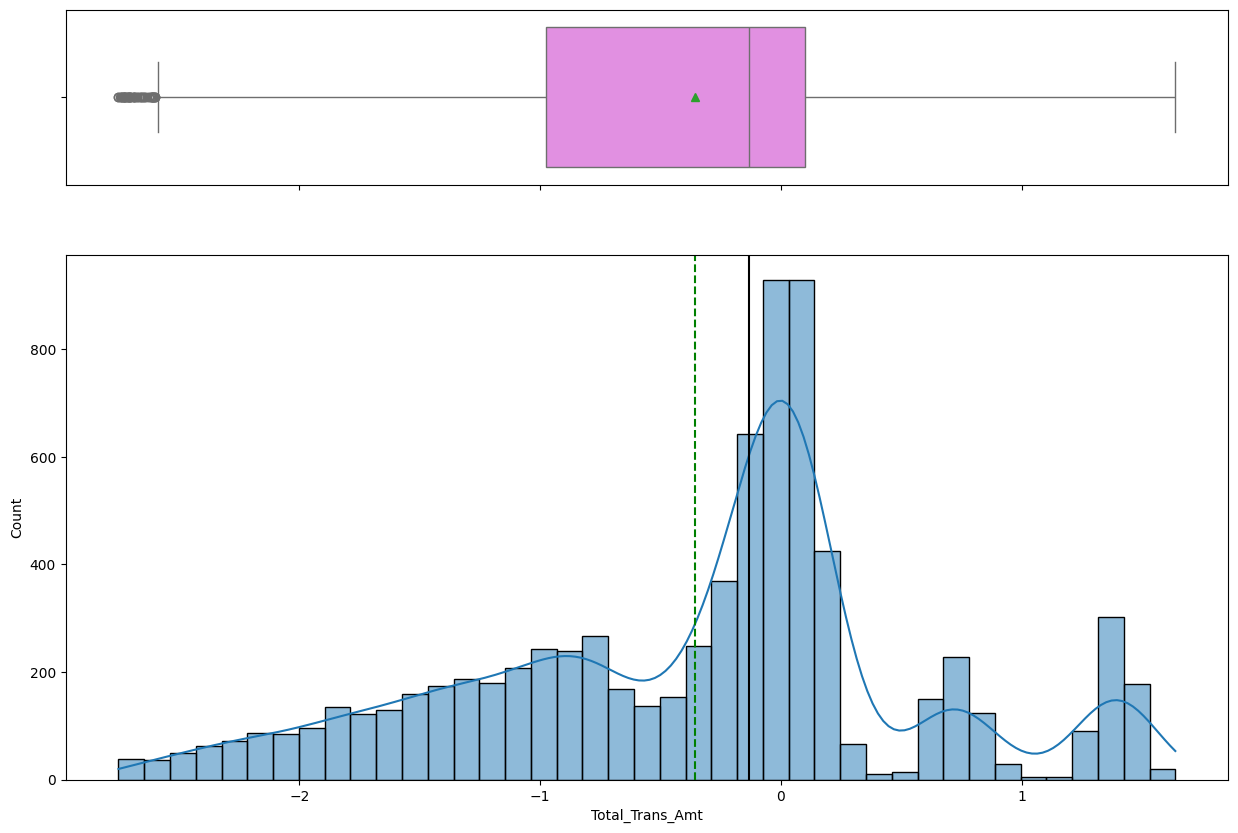

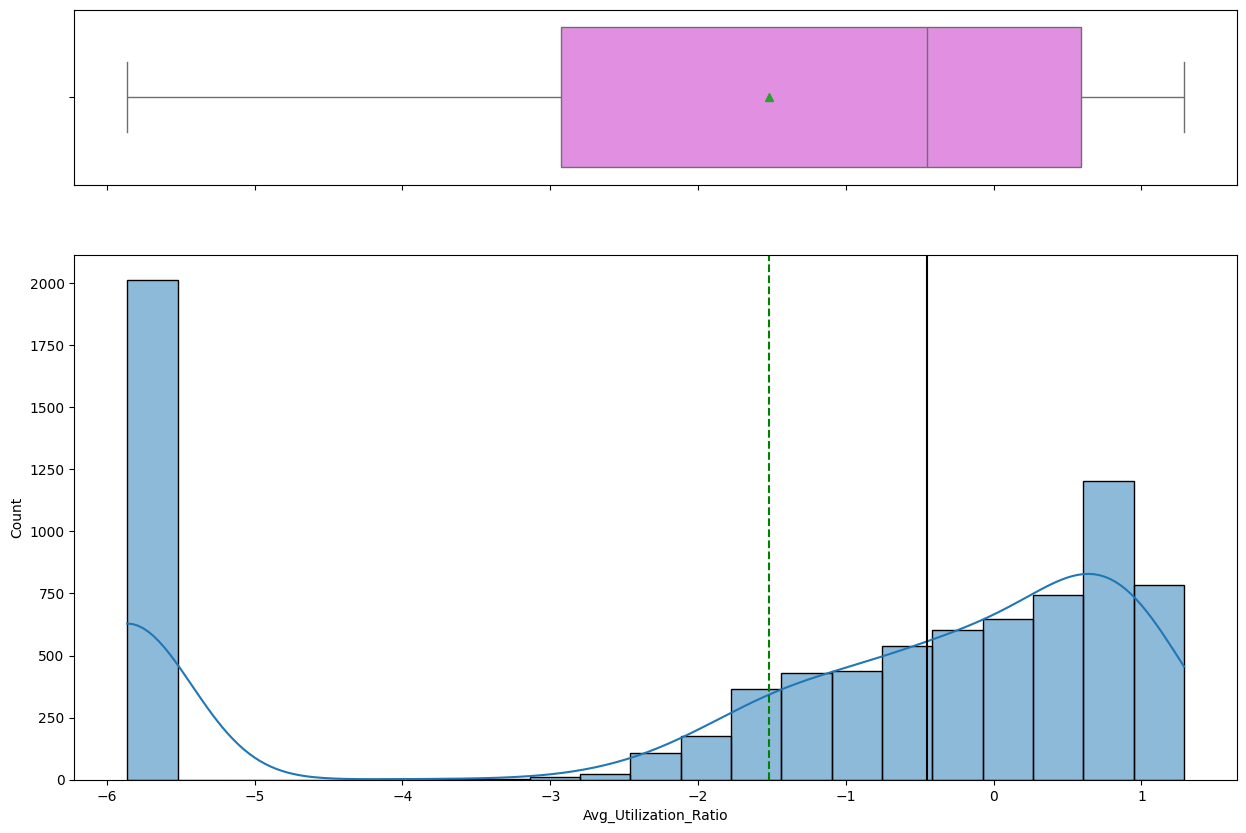

In [513]:
for col in columns_to_transform:
   histogram_boxplot(X_temp1, col, kde=True)

After applying a log transformation and handling outliers, we can see that the distribution is closer to a normal distribution (slightly left skewed) with no outliers
- Note: The average utilization ratio remained unchanged after all modifications, therefore we will keep it as is.

let's take care  of the outliers of these features 'Total_Amt_Chng_Q4_Q1'    'Total_Ct_Chng_Q4_Q1'

In [514]:
cols=['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']
for col in cols:
  # first and therd quartiles
  Q1 = X_temp1[col].quantile(0.25)
  Q3 = X_temp1[col].quantile(0.75)
  #Interquartile Range
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  X_temp1[col] = X_temp1[col][(X_temp1[col] >= lower_bound) & (X_temp1[col] <= upper_bound)]

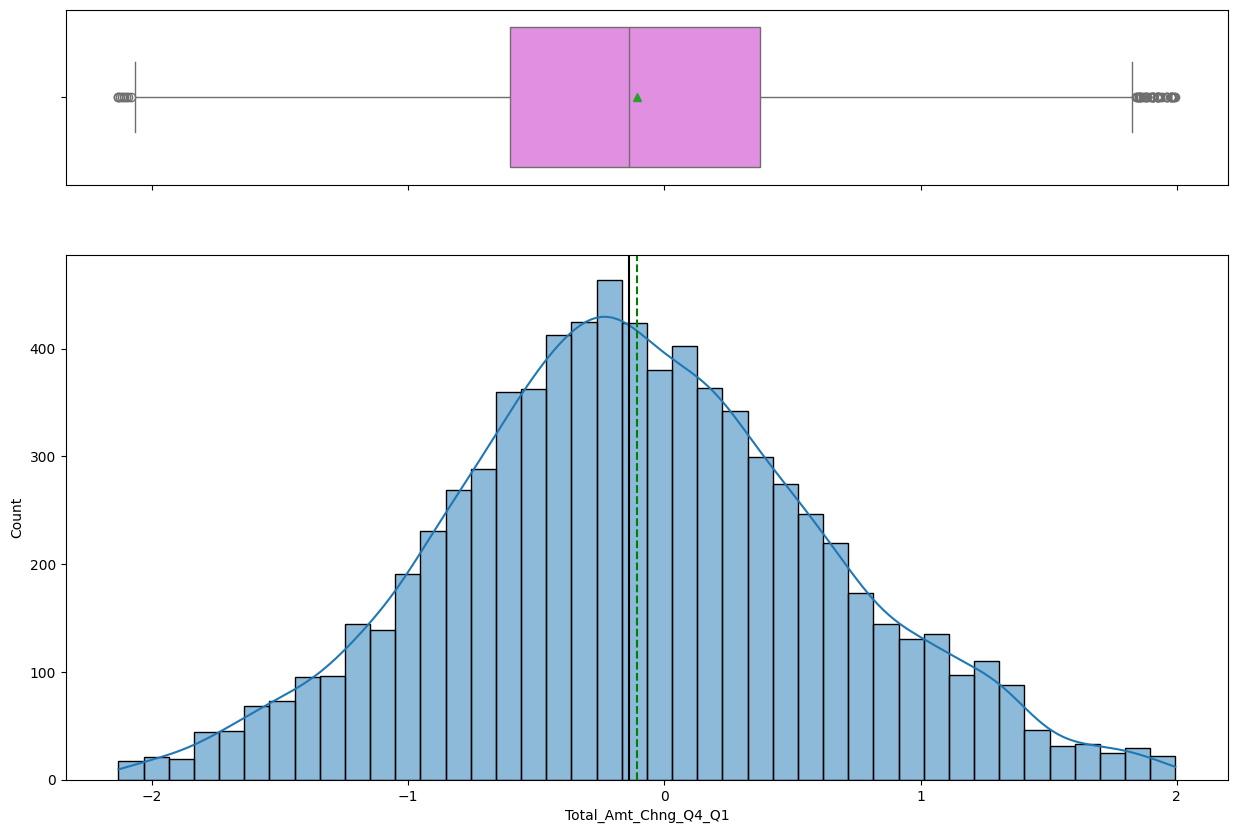

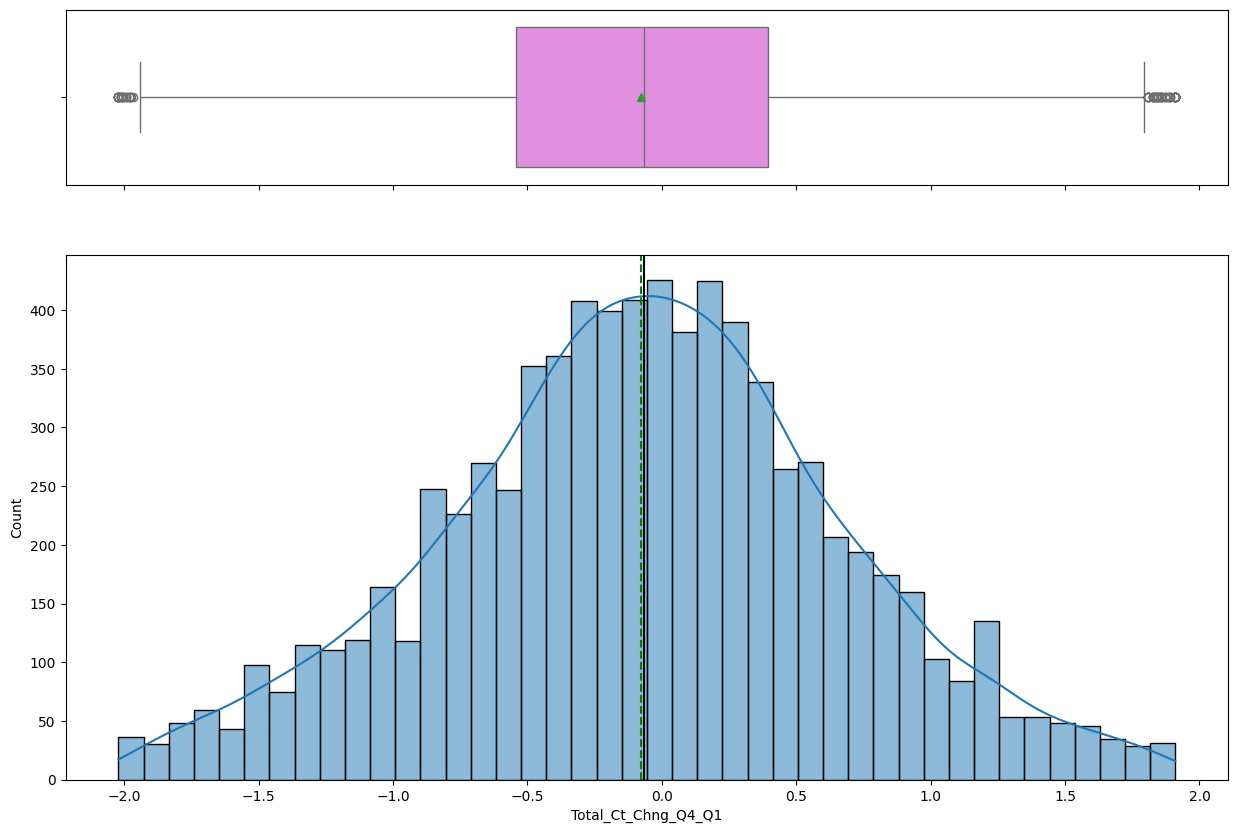

In [515]:
for col in cols:
   histogram_boxplot(X_temp1, col, kde=True)

Skewness and outliers have been well-addressed.

### Handling missing data

Treatment of missing values in the independent variable

In [516]:
X_temp1.isnull().sum()

Customer_Age                   0
Dependent_count                0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1         324
Total_Trans_Amt              317
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1          317
Avg_Utilization_Ratio          0
Gender                         0
Education_Level             1205
Marital_Status               600
Income_Category                0
Card_Category                  0
dtype: int64

In [517]:
# replace abc in the income category by missing

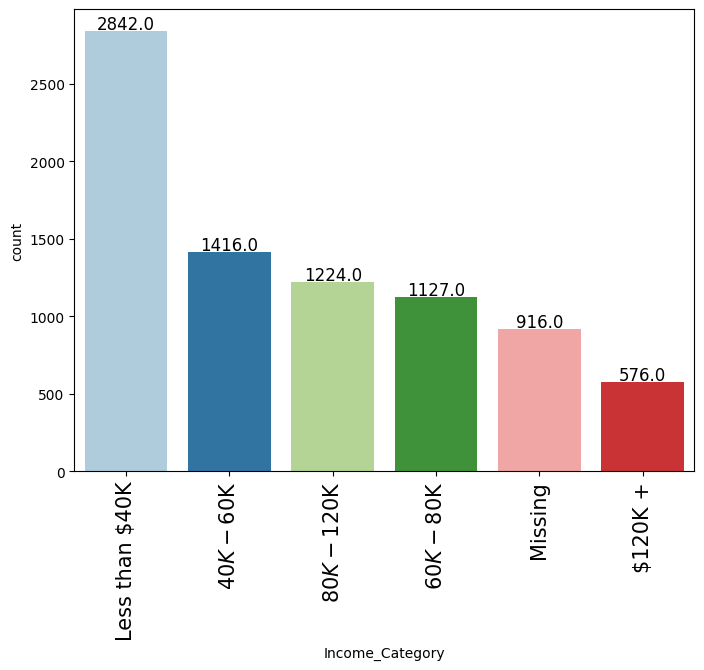

In [518]:
X_temp['Income_Category'] = X_temp['Income_Category'].astype(str)
# Create a new column combining education levels with missing values
X_temp['Income_Category'] = X_temp['Income_Category'].replace('abc', 'Missing')
labeled_barplot(X_temp, 'Income_Category')

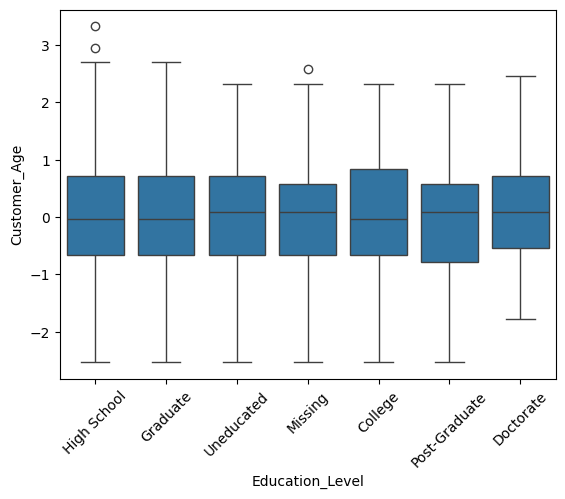

In [519]:
# Convert 'Education_Level' to a string type
X_temp1['Education_Level'] = X_temp1['Education_Level'].astype(str)

# Create a new column combining education levels with missing values
X_temp1['Education_Level'] = X_temp1['Education_Level'].replace('nan', 'Missing')

# Plot the boxplot with the new column
sns.boxplot(x='Education_Level', y='Customer_Age', data=X_temp1)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()


There is no significant dependency between age and education level, especially when considering missing values

<Axes: xlabel='Education_Level', ylabel='Marital_Status'>

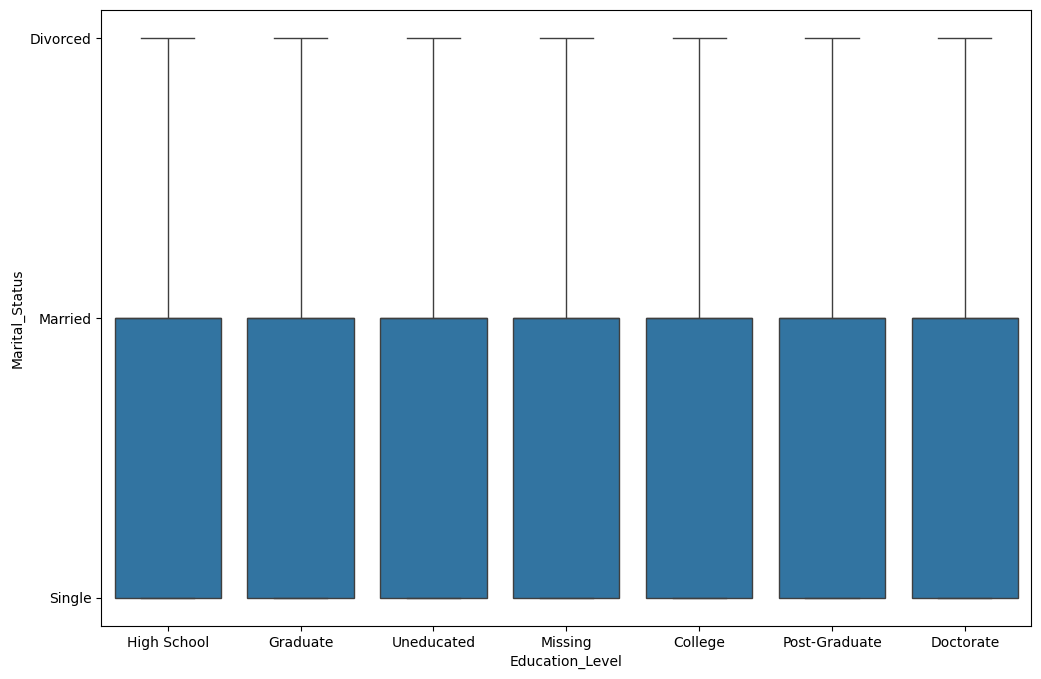

In [520]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Marital_Status',data=X_temp1)

also no significant dependency between marital status and education level

<Axes: xlabel='Education_Level', ylabel='Income_Category'>

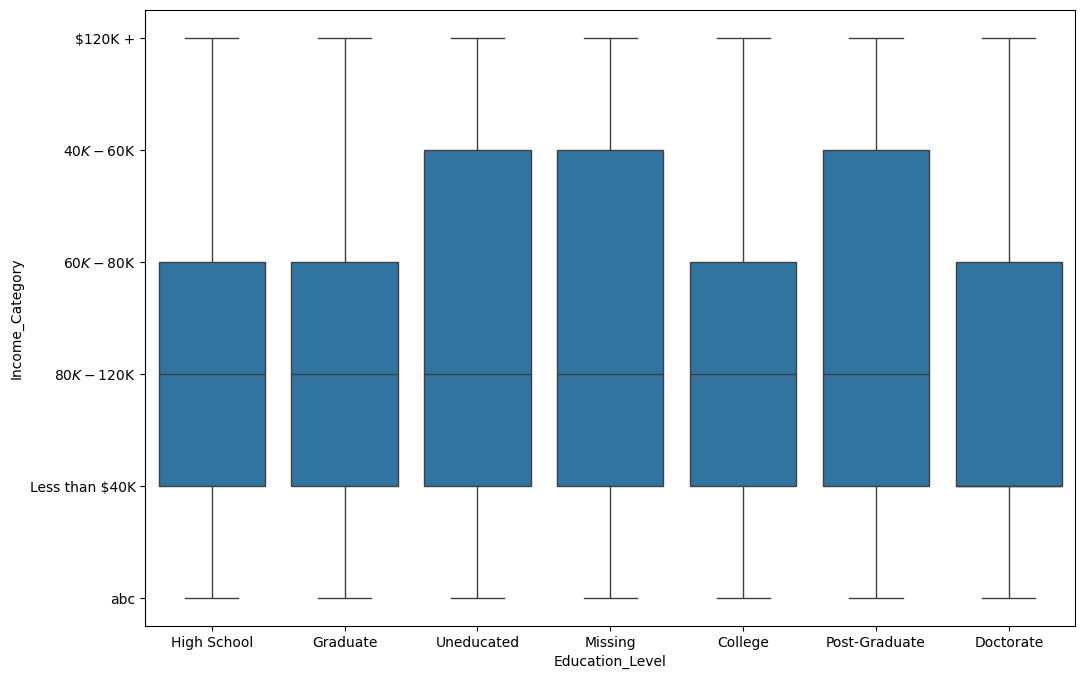

In [521]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Income_Category',data=X_temp1)

The distribution of missing values in the boxplot is similar to that of the uneducated and post_graduate group, categorized by income. This suggests that missing values and customers in this groups might have similar income distributions.

In [522]:
X_temp1.columns


Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

<Axes: xlabel='Education_Level', ylabel='Months_on_book'>

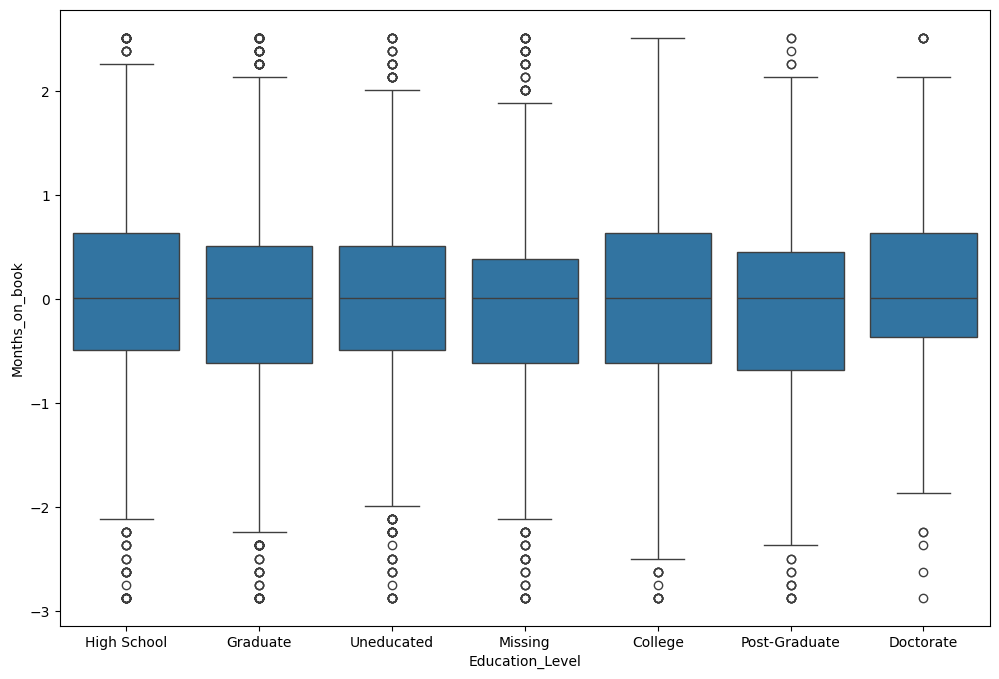

In [523]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Months_on_book',data=X_temp1)

no similarity between the missing value in education level and the month on book

<Axes: xlabel='Education_Level', ylabel='Credit_Limit'>

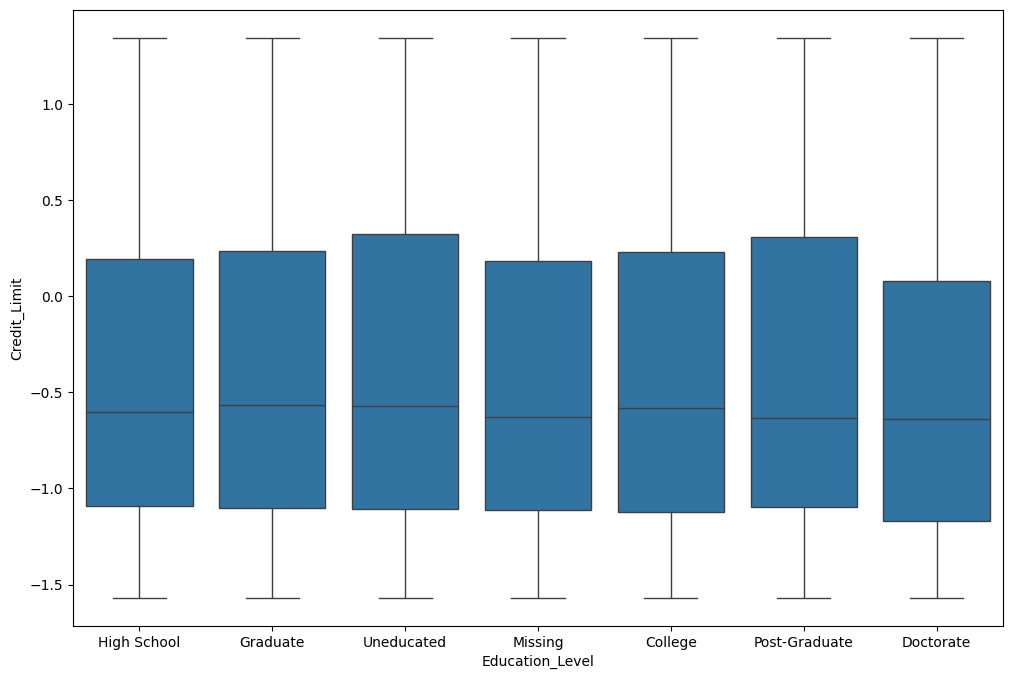

In [524]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Credit_Limit',data=X_temp1)

The presence of missing values in the education level might be related to credit limit, based on the similarity of the boxplot for the 'high school' category with the missing values.

In [525]:
# Group by 'Credit_Limit' and count occurrences of 'Education_Level_combined' being 'High School'
X_temp1[X_temp['Education_Level'] == 'High School'].groupby('Credit_Limit').size()

Credit_Limit
-1.568    70
-1.568     1
-1.567     1
-1.559     1
-1.558     2
          ..
1.310      1
1.314      1
1.317      1
1.337      1
1.348     74
Length: 1368, dtype: int64

<Axes: xlabel='Education_Level', ylabel='Avg_Open_To_Buy'>

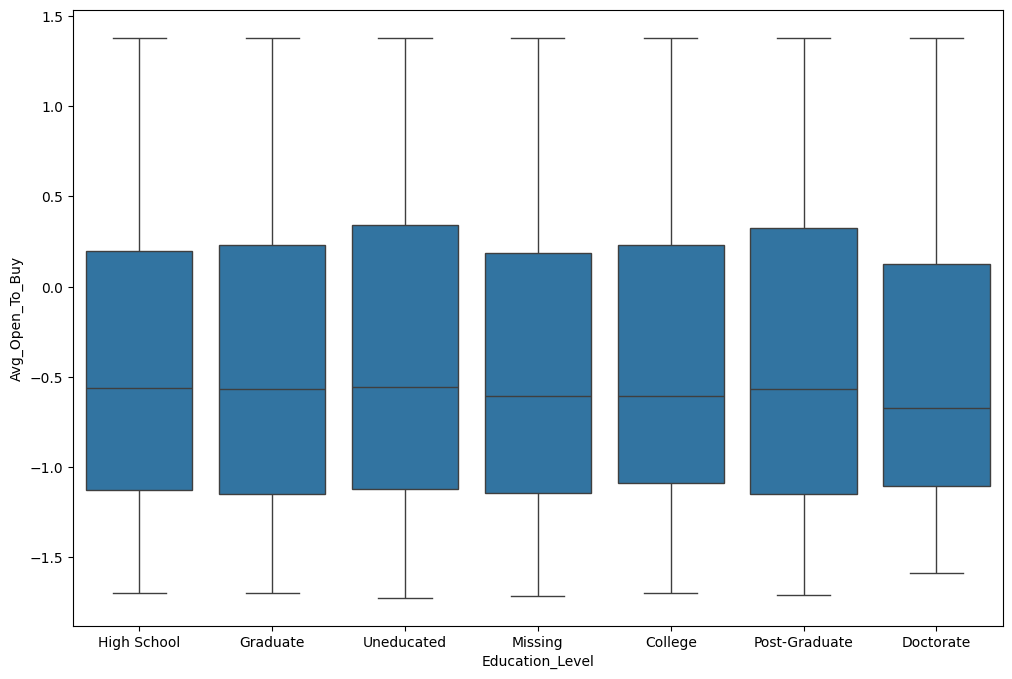

In [526]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Avg_Open_To_Buy',data=X_temp1)

The distribution of average open-to-buy appears similar for the missing value category and the 'high school' category based on the boxplots.

<Axes: xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

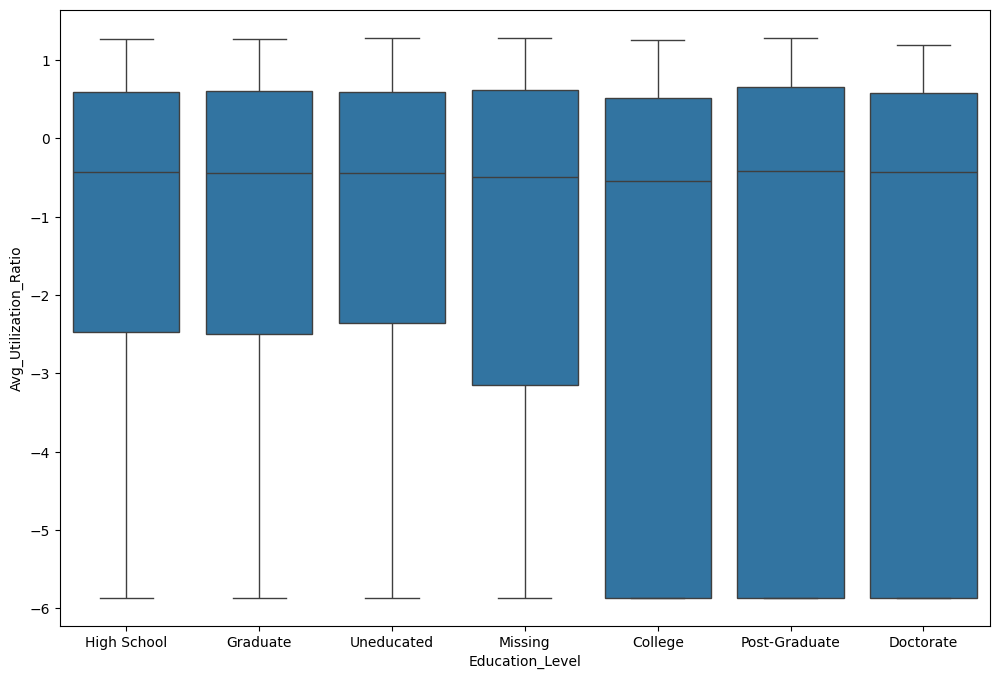

In [527]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education_Level',y='Avg_Utilization_Ratio',data=X_temp1)

The boxplots for average utilization ratio show similar distributions for the missing value category, the 'graduate' category, and the 'high school' category

<Figure size 2100x1200 with 0 Axes>

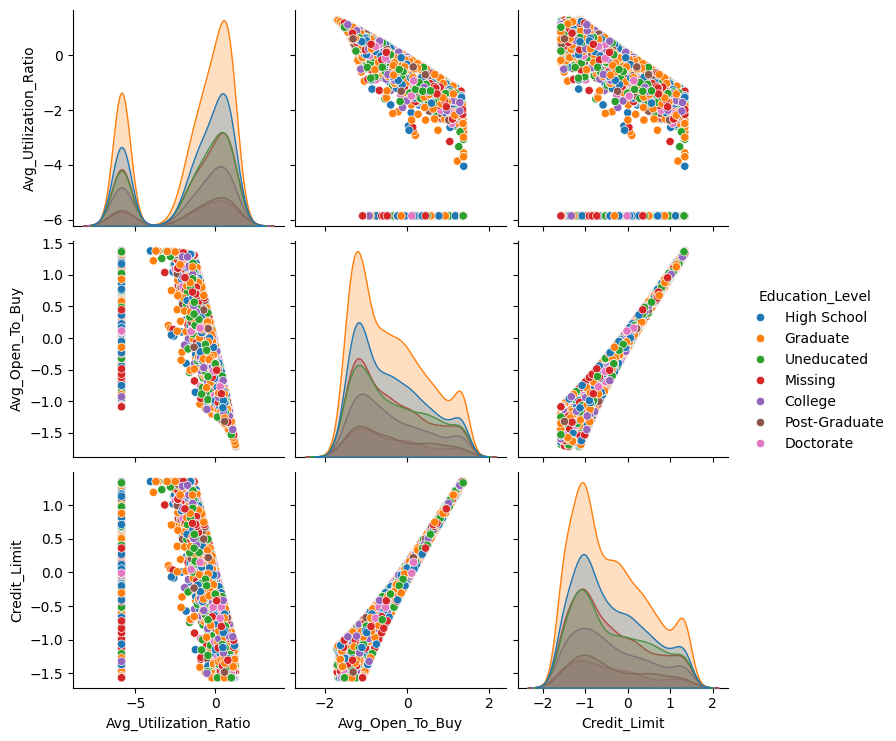

In [528]:
plt.figure(figsize=(21,12))
sns.pairplot(X_temp1, hue='Education_Level', vars=['Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Credit_Limit'])

Our data points likely exhibit similarities!

### Remarque :    
Problem:

- Imputing missing values with the mode (most frequent value) isn't suitable for our data due to its shape. We have missing values in "Education Level" (1205) and "Marital Status" (600), but the overall dataset size is only 8101 records. This indicates a small dataset with a significant portion of missing data. Additionally, the boxplots suggest potential similarities between data points, which the mode might not capture effectively.
- We can try to replicate this approach by plotting all features with missing values against other features. This will allow us to examine if missing points in one feature are dependent on values in other features  

Suggested Solution:

After researching imputation techniques, K-Nearest Neighbors (KNN) seems like a promising approach for this scenario. KNN identifies similar data points within the dataset based on specific features. In this case, we'd use KNN to impute missing values by finding the most similar existing data points and using their values to fill the gaps. This method leverages the existing data structure to estimate missing values without relying solely on the most frequent value.

In [529]:
X_temp2=X_temp1.copy()

In [530]:
X_temp2 = X_temp1.replace('Missing', np.nan)
X_temp2['Income_Category'] = X_temp2['Income_Category'].replace('abc', np.nan)

In [531]:
X_temp2.isnull().sum()

Customer_Age                   0
Dependent_count                0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1         324
Total_Trans_Amt              317
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1          317
Avg_Utilization_Ratio          0
Gender                         0
Education_Level             1205
Marital_Status               600
Income_Category              916
Card_Category                  0
dtype: int64

Three columns require missing value treatment: Education Level, Marital Status, and Income Category

In [532]:
# Mapping categorical values
marital_status_mapping = {'Married': 0, 'Single': 1, 'Divorced': 2}
education_level_mapping = {'Graduate': 0, 'High School': 1, 'Uneducated': 2, 'College': 3, 'Post Graduate': 4, 'Doctorate': 5}
income_category_mapping = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
# Apply mappings
X_temp2['Marital_Status'] = X_temp2['Marital_Status'].map(marital_status_mapping)
X_temp2['Education_Level'] = X_temp2['Education_Level'].map(education_level_mapping)
X_temp2['Income_Category'] = X_temp2['Income_Category'].map(income_category_mapping)

In [533]:
columns=['Marital_Status','Education_Level','Income_Category']

In [534]:
# using KNN imputer to fill in the missing values
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=10) # setting n_neighbors=10 will compare each data point with its 10 nearest neighbors across the 20 columns.
X_temp2_imputed = knn_imputer.fit_transform(X_temp2[columns])

In [535]:
# Convert the imputed array back to a DataFrame
X_temp2_imputed_df = pd.DataFrame(X_temp2_imputed, columns=columns)
# Round the values in the imputed DataFrame
X_temp2_imputed_df = X_temp2_imputed_df.round().astype(int)

In [536]:
# Reset index of X_temp1 to default integer index
X_temp2 = X_temp2.reset_index(drop=True)
# Ensure index alignment
X_temp2_imputed_df.index = X_temp2.index
# update the dataset
X_temp2.loc[:, columns] = X_temp2_imputed_df

In [537]:
# Check the updated value counts
for col in ['Marital_Status', 'Education_Level', 'Income_Category']:
    print(f"Value counts for {col}:")
    print(X_temp2[col].value_counts(dropna=False))
    print('-' * 20)

Value counts for Marital_Status:
Marital_Status
0    4144
1    3353
2     604
Name: count, dtype: int64
--------------------
Value counts for Education_Level:
Education_Level
1.000    2597
0.000    2493
2.000    1832
3.000     815
5.000     364
Name: count, dtype: int64
--------------------
Value counts for Income_Category:
Income_Category
0    2851
1    1905
2    1421
3    1348
4     576
Name: count, dtype: int64
--------------------


In [538]:
# Create reverse mappings
marital_status_reverse_mapping = {v: k for k, v in marital_status_mapping.items()}
education_level_reverse_mapping = {v: k for k, v in education_level_mapping.items()}
income_category_reverse_mapping = {v: k for k, v in income_category_mapping.items()}

# Apply reverse mappings to the Data
X_temp2['Marital_Status'] = X_temp2['Marital_Status'].map(marital_status_reverse_mapping)
X_temp2['Education_Level'] = X_temp2['Education_Level'].map(education_level_reverse_mapping)
X_temp2['Income_Category'] = X_temp2['Income_Category'].map(income_category_reverse_mapping)

In [539]:
for col in ['Marital_Status', 'Education_Level', 'Income_Category']:
    print(f"Value counts for {col}:")
    print(X_temp2[col].value_counts(dropna=False))
    print('-' * 20)
    print(f"Value counts for  {col} for old data :")
    print(X_temp1[col].value_counts(dropna=False))
    print('==' * 20)


Value counts for Marital_Status:
Marital_Status
Married     4144
Single      3353
Divorced     604
Name: count, dtype: int64
--------------------
Value counts for  Marital_Status for old data :
Marital_Status
Married     3737
Single      3160
Divorced     604
NaN          600
Name: count, dtype: int64
Value counts for Education_Level:
Education_Level
High School    2597
Graduate       2493
Uneducated     1832
College         815
Doctorate       364
Name: count, dtype: int64
--------------------
Value counts for  Education_Level for old data :
Education_Level
Graduate         2493
High School      1611
Uneducated       1206
Missing          1205
College           815
Post-Graduate     407
Doctorate         364
Name: count, dtype: int64
Value counts for Income_Category:
Income_Category
Less than $40K    2851
$40K - $60K       1905
$60K - $80K       1421
$80K - $120K      1348
$120K +            576
Name: count, dtype: int64
--------------------
Value counts for  Income_Category for old d

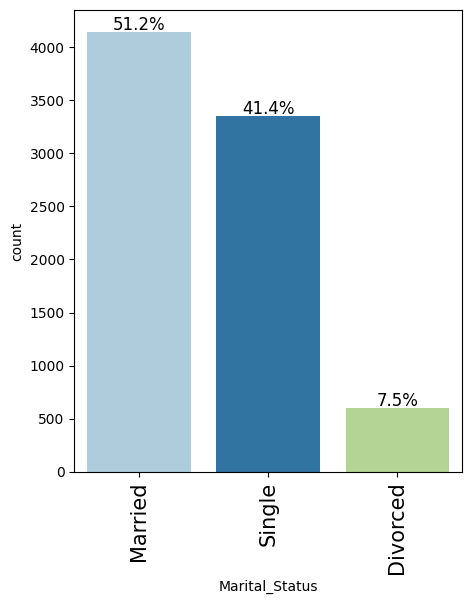

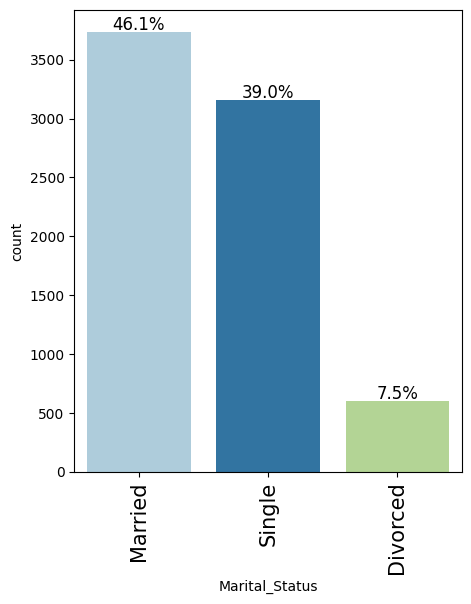

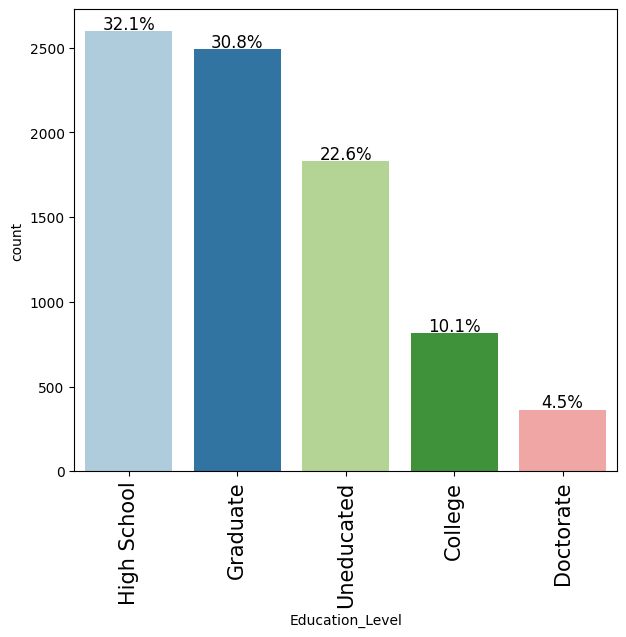

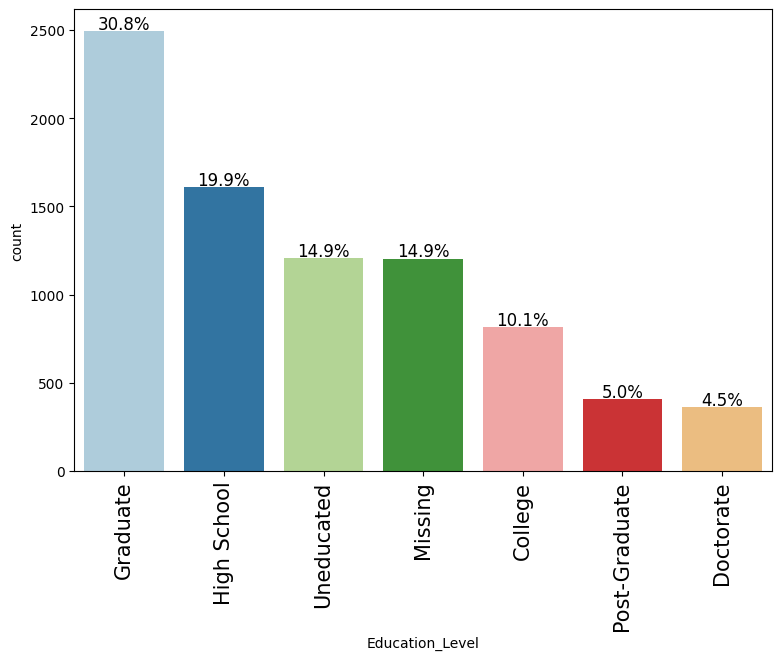

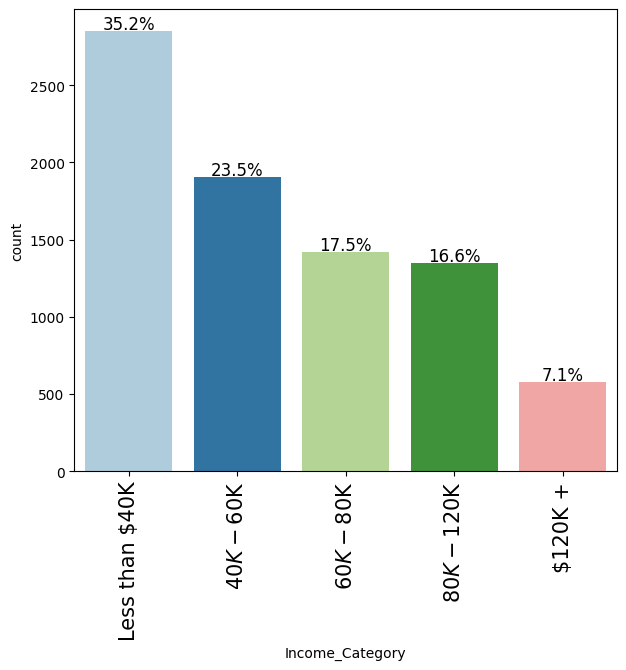

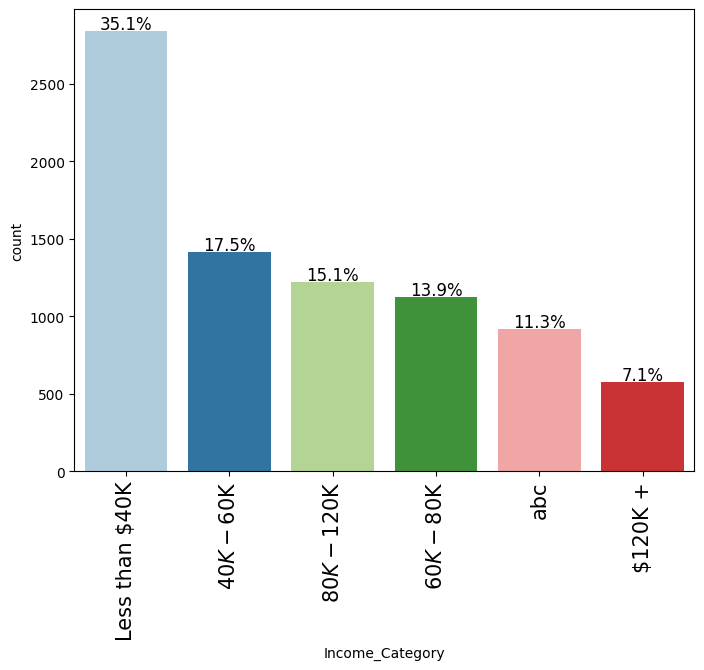

In [540]:
for col in ['Marital_Status', 'Education_Level', 'Income_Category']:
  labeled_barplot(X_temp2,col,perc=True)
  labeled_barplot(X_temp1, col,perc=True)
  print('==' * 35 )

In [541]:
X_temp2.isnull().sum()

Customer_Age                  0
Dependent_count               0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1        324
Total_Trans_Amt             317
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1         317
Avg_Utilization_Ratio         0
Gender                        0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category                 0
dtype: int64

In [542]:
# using KNN imputer to fill in the missing values introrduced when handinling outliers  values
# We could simply remove those missing values , but since our dataset is small, we want to avoid losing any information.
columns1= ['Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']
knn_imputer = KNNImputer(n_neighbors=10) # setting n_neighbors=10 will compare each data point with its 10 nearest neighbors across the 20 columns.
X_temp3_imputed = knn_imputer.fit_transform(X_temp2[columns1])

# Convert the imputed array back to a DataFrame
X_temp3_imputed_df = pd.DataFrame(X_temp3_imputed, columns=columns1)
# Round the values in the imputed DataFrame
X_temp3_imputed_df = X_temp3_imputed_df.round().astype(int)

# Reset index of X_temp1 to default integer index
X_temp2 = X_temp2.reset_index(drop=True)
# Ensure index alignment
X_temp3_imputed_df.index = X_temp2.index
# update the dataset
X_temp2.loc[:, columns1] = X_temp3_imputed_df

In [543]:
X_temp2.isnull().sum()

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
dtype: int64

- The missing values have been successfully filled in.
- Since the data distribution appears largely unchanged after imputation, using KNNImputer is confirmed as a suitable choice compared to simply filling missing values with the mode, which would likely distort the distribution.

Missing values have been addressed.

### Encode categorical variables

In [544]:
X_temp3=X_temp2.copy()

In [545]:
X_temp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              8101 non-null   float64 
 1   Dependent_count           8101 non-null   float64 
 2   Months_on_book            8101 non-null   float64 
 3   Total_Relationship_Count  8101 non-null   float64 
 4   Months_Inactive_12_mon    8101 non-null   float64 
 5   Contacts_Count_12_mon     8101 non-null   float64 
 6   Credit_Limit              8101 non-null   float64 
 7   Total_Revolving_Bal       8101 non-null   float64 
 8   Avg_Open_To_Buy           8101 non-null   float64 
 9   Total_Amt_Chng_Q4_Q1      8101 non-null   float64 
 10  Total_Trans_Amt           8101 non-null   float64 
 11  Total_Trans_Ct            8101 non-null   float64 
 12  Total_Ct_Chng_Q4_Q1       8101 non-null   float64 
 13  Avg_Utilization_Ratio     8101 non-null   float6

In [546]:
cat_cols = X_temp3.select_dtypes(include=['category','object']).columns
dummies = pd.get_dummies(X_temp3[cat_cols], drop_first=True)
X_temp3 = X_temp3.drop(columns=cat_cols)
X_temp4 = pd.concat([X_temp3, dummies], axis=1)

In [547]:
X_temp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8101 non-null   float64
 1   Dependent_count                 8101 non-null   float64
 2   Months_on_book                  8101 non-null   float64
 3   Total_Relationship_Count        8101 non-null   float64
 4   Months_Inactive_12_mon          8101 non-null   float64
 5   Contacts_Count_12_mon           8101 non-null   float64
 6   Credit_Limit                    8101 non-null   float64
 7   Total_Revolving_Bal             8101 non-null   float64
 8   Avg_Open_To_Buy                 8101 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            8101 non-null   float64
 10  Total_Trans_Amt                 8101 non-null   float64
 11  Total_Trans_Ct                  8101 non-null   float64
 12  Total_Ct_Chng_Q4_Q1             81

In [548]:
X_temp4.shape

(8101, 28)

The number of columns has increased to 29

### Split our data ( X_temp4 and y_temp)  into training and test data

In [549]:
y.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [550]:
y_temp.value_counts()

Attrition_Flag
1    6799
0    1302
Name: count, dtype: int64

In [552]:
X_ttrain, X_val, y_ttrain, y_val = train_test_split(X_temp4, y_temp, test_size=0.2, random_state=1,stratify=y_temp)

In [553]:
variables = [X_ttrain, X_val, y_ttrain, y_val]
names = ['X_ttrain', 'X_validation', 'y_ttrain', 'y_validation']
for var, name in zip(variables, names):
    print(f'The shape of {name} is: {var.shape}')

The shape of X_ttrain is: (6480, 28)
The shape of X_validation is: (1621, 28)
The shape of y_ttrain is: (6480,)
The shape of y_validation is: (1621,)


### Comclusion : Data preprocessing
- Addressing missing values: We employed KNNImputer to handle missing data, preserving the original data structure.
- Skewness: Log transformation was applied to effectively address skewness while maintaining the overall data distribution. This step is crucial to prevent model bias.
- Outliers: The interquartile range (IQR) method was used to identify and remove outliers lying beyond 1.5 times the IQR.
- Data Splitting: The data was divided into training and testing sets, preparing it for model input
- Evaluation: The impact of these data preprocessing steps on model performance will be assessed to optimize results.


### Model building

# Model Performance Measurement

Our goal is to predict customer attrition from credit cards. While **accuracy** measurement is essential, it's not sufficient.

- Therefore, we propose considering three performance measures: recall to minimize losses (focus on the false negative rate), precision to minimize charges (focus on the false positive rate), and F1-score to balance recall and precision.

- Our choice will depend on the bank's service improvement goals. To reduce customer churn and assist attrited customers, **recall** is a valuable performance measure.

- However, if the bank plans to offer discounts to customers, **precision** or **F1-score** might be more suitable.

In [554]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [555]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Initial model building

**Model Building - Original Data**

In [556]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_ttrain, y_ttrain)
    scores = recall_score(y_ttrain, model.predict(X_ttrain))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_ttrain, y_ttrain)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9972421400992829
Random forest: 1.0
GBM: 0.9858429858429858
Adaboost: 0.9748115462401177
dtree: 1.0

Validation Performance:

Bagging: 0.9713235294117647
Random forest: 0.986764705882353
GBM: 0.9823529411764705
Adaboost: 0.9772058823529411
dtree: 0.9558823529411765


**Model Analysis**:

- Bagging performs well but might be overfitting.
- Random Forest tends to overfit.
- GBM shows strong performance but is also a potential overfitting candidate.
- Adaboost achieves excellent recall but may overfit.
- Decision Tree is notoriously prone to overfitting.

**Note**: To definitively assess these models, we must evaluate them on our reserved test set.


**NOTE 1 **:   because all models give such a good score accept random forest and decision that abviously overfit , we may want to add anther performance measure like accuracy  

In [557]:
 for name, model in models:
  print(f"Confusion Matrix for {name}:")
  model_performance_classification_sklearn(model, X_ttrain, y_ttrain)


Confusion Matrix for Bagging:
Confusion Matrix for Random forest:
Confusion Matrix for GBM:
Confusion Matrix for Adaboost:
Confusion Matrix for dtree:


In [558]:
for name, model in models:
    # Compute the model performance metrics using your function
    df_perf = model_performance_classification_sklearn(model, X_ttrain, y_ttrain)
    df_perf1 = model_performance_classification_sklearn(model, X_val,y_val)
    # Print the model performance metrics
    print(f"\033[1mModel Performance for {name}:\033[0m")
    #print(f"Model Performance for {name}:")
    print('\033[1m\033[4m-----train_set----\033[0m')
    print(df_perf)
    print('\033[1m\033[4m-----validation_set----\033[0m')
    print(df_perf1)
    print('='*45)  # Print a blank line for readability


Model Performance for Bagging:
-----train_set----
   Accuracy  Recall  Precision    F1
0     0.996   0.997      0.998 0.998
-----validation_set----
   Accuracy  Recall  Precision    F1
0     0.932   0.971      0.949 0.960
Model Performance for Random forest:
-----train_set----
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
-----validation_set----
   Accuracy  Recall  Precision    F1
0     0.929   0.987      0.933 0.959
Model Performance for GBM:
-----train_set----
   Accuracy  Recall  Precision    F1
0     0.960   0.986      0.968 0.977
-----validation_set----
   Accuracy  Recall  Precision    F1
0     0.944   0.982      0.953 0.967
Model Performance for Adaboost:
-----train_set----
   Accuracy  Recall  Precision    F1
0     0.945   0.975      0.960 0.967
-----validation_set----
   Accuracy  Recall  Precision    F1
0     0.941   0.977      0.953 0.965
Model Performance for dtree:
-----train_set----
   Accuracy  Recall  Precision    F1
0     1.000   1.000     

After examining the accuracy scores, we determined that the GBM model exhibits strong performance.

Confusion Matrix for Bagging:
Confusion Matrix for Random forest:
Confusion Matrix for GBM:
Confusion Matrix for Adaboost:
Confusion Matrix for dtree:


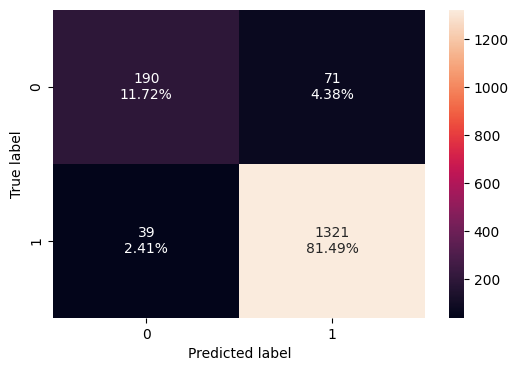

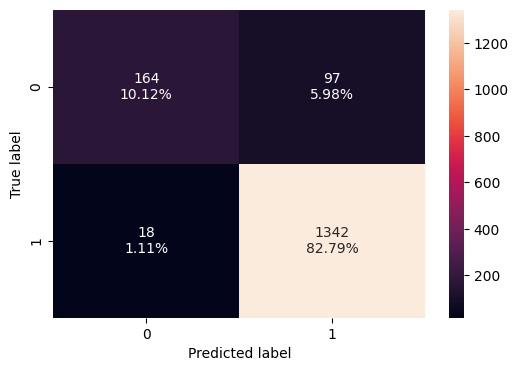

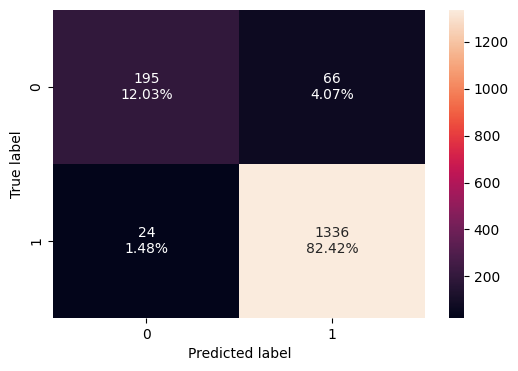

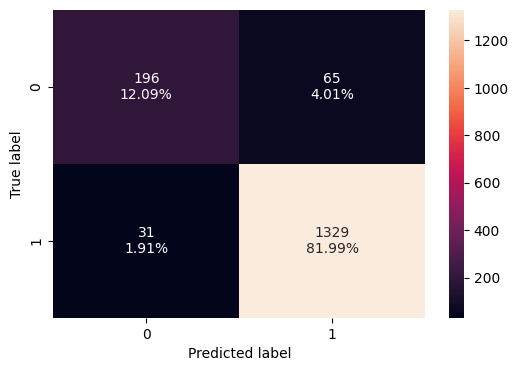

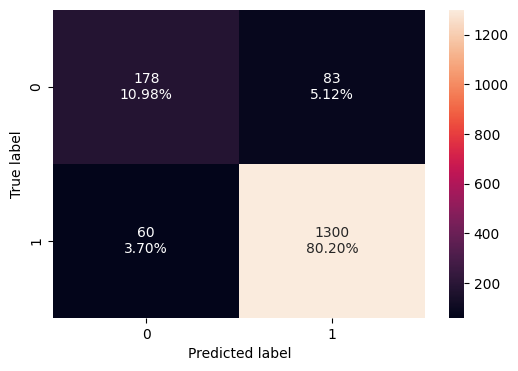

In [559]:
for name, model in models:
    print(f"Confusion Matrix for {name}:")
    confusion_matrix_sklearn(model, X_val, y_val)

Despite achieving these recall score values, the model still requires adjustments

In [560]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_ttrain, y_ttrain)
    scores_train = recall_score(y_ttrain, model.predict(X_ttrain))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9972, Validation Score: 0.9713, Difference: 0.0259
Random forest: Training Score: 1.0000, Validation Score: 0.9868, Difference: 0.0132
GBM: Training Score: 0.9858, Validation Score: 0.9824, Difference: 0.0035
Adaboost: Training Score: 0.9748, Validation Score: 0.9772, Difference: -0.0024
dtree: Training Score: 1.0000, Validation Score: 0.9559, Difference: 0.0441


Comparing difference of recall scores indicates that GBM is a strong potential model

### Model Building - Oversampled Data

In [561]:
print("Before Oversampling, counts of label 'Existing Customer': {}".format(sum(y_ttrain == 1)))
print("Before Oversampling, counts of label 'Attrited Customer': {} \n".format(sum(y_ttrain == 0)))
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_ttrain, y_ttrain)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Existing Customer': 5439
Before Oversampling, counts of label 'Attrited Customer': 1041 

After Oversampling, counts of label 'Yes': 5439
After Oversampling, counts of label 'No': 5439 

After Oversampling, the shape of train_X: (10878, 28)
After Oversampling, the shape of train_y: (10878,) 



The SMOTE technique generates synthetic data for our imbalanced variable, creating a more balanced dataset

Let's evaluate our previous model on this synthetic data

In [562]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9966905681191396
Random forest: 1.0
GBM: 0.966721823864681
Adaboost: 0.9479683765398051
dtree: 1.0

Validation Performance:

Bagging: 0.9691176470588235
Random forest: 0.975735294117647
GBM: 0.9720588235294118
Adaboost: 0.9558823529411765
dtree: 0.9551470588235295


We can see that the performance has remained relatively consistent with only minor changes.

### Model Building - Undersampled Data

now let's try undersamling where we can remove same point to get more balanced data

In [563]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_ttrain, y_ttrain)

In [564]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_ttrain == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_ttrain == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5439
Before Under Sampling, counts of label 'No': 1041 

After Under Sampling, counts of label 'Yes': 1041
After Under Sampling, counts of label 'No': 1041 

After Under Sampling, the shape of train_X: (2082, 28)
After Under Sampling, the shape of train_y: (2082,) 



We reduced the dataset from nearly 6,000 points to 1,000 using undersampling technique.

we are gonna train our model on this inder sampling dataset

In [565]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9846301633045149
Random forest: 1.0
GBM: 0.9577329490874159
Adaboost: 0.9164265129682997
dtree: 1.0

Validation Performance:

Bagging: 0.8757352941176471
Random forest: 0.9257352941176471
GBM: 0.9235294117647059
Adaboost: 0.9102941176470588
dtree: 0.8647058823529412


Performance has decreased compared to both the original and oversampled data. This is expected as undersampling is generally not the optimal choice for small datasets

In [566]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9846, Validation Score: 0.8757, Difference: 0.1089
Random forest: Training Score: 1.0000, Validation Score: 0.9257, Difference: 0.0743
GBM: Training Score: 0.9577, Validation Score: 0.9235, Difference: 0.0342
Adaboost: Training Score: 0.9164, Validation Score: 0.9103, Difference: 0.0061
dtree: Training Score: 1.0000, Validation Score: 0.8647, Difference: 0.1353


## Hyperparameter Tuning

**note** :
- Given the minimal performance improvements with oversampling and undersampling, we will proceed with the original dataset.
- To minimize computational costs and based on the results of RandomSearchCV, we will adopt Random Search as our primary hyperparameter tuning technique for our models.

### **Tuning AdaBoostClassifier model**

In [567]:
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 100, 10),  # Number of boosting stages to be run
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5, 1],  # Step size shrinkage
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],  # Base estimator used for boosting
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_ttrain, y_ttrain)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 30, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:


the recall score is 1 , should be overfitting

In [568]:
# train abadoost using the best hyperparameter tuned before
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_ttrain, y_ttrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=30, random_state=1)

In [569]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_ttrain, y_ttrain)
adb_train

Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.913

In [570]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.912

Both the training and validation sets have a recall of 1, meaning the model correctly identifies all positive instances in both sets.

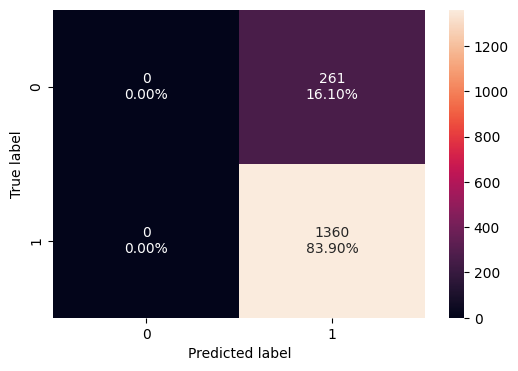

In [571]:
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

These results might be misleading! We will verify the model's performance by evaluating it on unseen data.



### **Tuning Gradient Boosting**

In [572]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 200, 10),  # Number of boosting stages (expanded range)
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1],  # Learning rates to try (expanded range)
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples for fitting (expanded range)
    "max_features": [0.3, 0.5, 0.7, 0.9, 1.0],  # Fraction of features to consider (expanded range)
    "max_depth": np.arange(3, 10, 1),  # Maximum depth of trees (added parameter)
    "min_samples_split": [2, 5, 10, 15],  # Minimum number of samples to split a node (added parameter)
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum number of samples at a leaf node (added parameter)
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],  # Initializers
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_ttrain,y_ttrain)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 70, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 3, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9829005222144055:
CPU times: user 7.14 s, sys: 901 ms, total: 8.04 s
Wall time: 7min 32s


The recall score provided here is 0.98, which is more realistic than the previous score obtained from Adaboost.

In [573]:
# train abadoost using the best hyperparameter tuned before
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample = 0.8,
    n_estimators=70,
    min_samples_split=15,
    min_samples_leaf=5,
    max_depth =3,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_ttrain, y_ttrain)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           min_samples_leaf=5, min_samples_split=15,
                           n_estimators=70, random_state=1, subsample=0.8)

In [574]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_ttrain, y_ttrain)
gbm_train

Accuracy  Recall  Precision    F1
0     0.955   0.987      0.960 0.973

In [575]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

Accuracy  Recall  Precision    F1
0     0.941   0.985      0.947 0.966

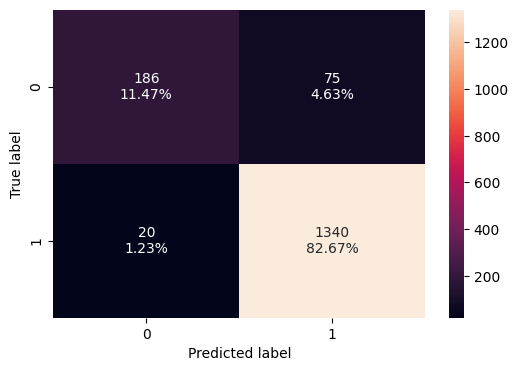

In [576]:
confusion_matrix_sklearn(tuned_gbm, X_val, y_val)

The gradient boosting model trained here appears to be more realistic than Adaboost, with both training and validation set recall scores approaching 99%

### **Tuning Random Forest**

In [577]:
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 201, 10),  # Number of trees in the forest
    "max_depth": np.arange(3, 21, 1),  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum number of samples required to be at a leaf node
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7, 1.0],  # Number of features to consider for the best split
    "bootstrap": [True, False],  # Whether bootstrap samples are used when building trees
    "class_weight": [None, "balanced"],  # Weights associated with classes
    "criterion": ["gini", "entropy"]  # Function to measure the quality of a split
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_ttrain,y_ttrain)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 170, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True} with CV score=0.9902551544997025:


In [578]:
# train abadoost using the best hyperparameter tuned before
tuned_rf = RandomForestClassifier(
    random_state=1,
    n_estimators=170,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features='log2',
    max_depth=5,
    criterion='entropy',
    class_weight=None,  # Fixed: Removed the period
    bootstrap=True
)
tuned_rf.fit(X_ttrain, y_ttrain)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=170, random_state=1)

In [579]:
# Checking model's performance on training set
rf_train = model_performance_classification_sklearn(tuned_rf, X_ttrain, y_ttrain)
rf_train

Accuracy  Recall  Precision    F1
0     0.904   0.991      0.904 0.945

In [580]:
# Checking model's performance on training set
rf_val = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
rf_val

Accuracy  Recall  Precision    F1
0     0.905   0.994      0.903 0.946

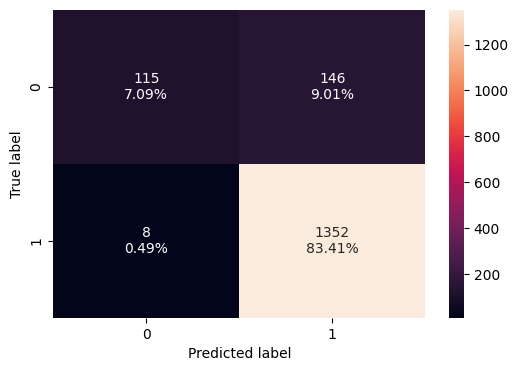

In [581]:
confusion_matrix_sklearn(tuned_rf, X_val, y_val)

While the Random Forest model exhibits a higher recall score of 0.996 compared to Gradient Boosting, its overall accuracy is lower.

we've been trained three models , adaboost , gradient boosting and now let's check also the random forst as well as the xbgboost

**XGBClassifier model**

In [582]:
# train initial XGB classifier
xgb_initial = XGBClassifier(random_state=1)
xgb_initial.fit(X_ttrain, y_ttrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [583]:
# Checking model's performance on training set
xgb_initial_train = model_performance_classification_sklearn(xgb_initial, X_ttrain, y_ttrain)
xgb_initial_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [584]:
# Checking model's performance on training set
xgb_initial_val = model_performance_classification_sklearn(xgb_initial, X_val, y_val)
xgb_initial_val

Accuracy  Recall  Precision    F1
0     0.954   0.984      0.963 0.973

The model is performing exceptionally well on both the training and validation sets, which could indicate overfitting. We will proceed with hyperparameter tuning to investigate further

In [585]:
# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': np.arange(50, 201, 10),  # Number of trees in the ensemble
    'max_depth': np.arange(3, 11, 1),        # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # Step size shrinking to prevent overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],      # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2, 0.5],             # Regularization term to control overfitting
    'scale_pos_weight': [1, 2, 3]            # Scaling factor for the class imbalance
}
xgb_model = XGBClassifier(random_state=1)
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_ttrain,y_ttrain)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0} with CV score=1.0:


In [586]:
# train abadoost using the best hyperparameter tuned before
tuned_xgb = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=2,
    n_estimators=50,
    max_depth=6,
    learning_rate=0.01,
    gamma=0.5,
    colsample_bytree=1.0,
    random_state=1
)

tuned_xgb.fit(X_ttrain, y_ttrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [587]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_ttrain, y_ttrain)
xgb_train

Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.913

In [588]:
# Checking model's performance on training set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.912

The XGB classifier performs exceptionally well, particularly in terms of recall score.


## Model Comparison and Final Model Selection

In [589]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        gbm_train.T,
        rf_train.T,
        xgb_train.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost ",
    "Gradient boosting ",
    "Random Forest ",
    "XGBoost ",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost   Gradient boosting   Random Forest   XGBoost 
Accuracy       0.839               0.955           0.904     0.839
Recall         1.000               0.987           0.991     1.000
Precision      0.839               0.960           0.904     0.839
F1             0.913               0.973           0.945     0.913

Remark: AdaBoost and XGBoost achieved similar scores.
On the training set, all models performed exceptionally well with strong scores across the board. However, while AdaBoost reached a perfect recall of 1, Gradient Boosting demonstrated superior overall performance with an accuracy of 0.94 and a recall score of 0.985

In [590]:

models_train_comp_df = pd.concat(
    [ adb_val.T,
        gbm_val.T,
        rf_val.T,
        xgb_val.T], axis=1,
)
models_train_comp_df.columns = [
     "AdaBoost ",
    "Gradient boosting ",
    "Random Forest ",
    "XGBoost ",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


AdaBoost   Gradient boosting   Random Forest   XGBoost 
Accuracy       0.839               0.941           0.905     0.839
Recall         1.000               0.985           0.994     1.000
Precision      0.839               0.947           0.903     0.839
F1             0.912               0.966           0.946     0.912

For the validation set:

- AdaBoost and XGBoost produced comparable results.
- AdaBoost maintained perfect recall but lower accuracy, while Gradient Boosting demonstrated strong performance in both recall and accuracy.

### Evaluating Model Performance on a Test Set

**NOTE** : Before evaluating performance on the test set, we must preprocess the test data.

**preprocessing the test set**

In [591]:
print('the test set size is : ',X_test.shape,' and the target variable in test set is : ',y_test.shape)

the test set size is :  (2026, 19)  and the target variable in test set is :  (2026,)


In [592]:
X_test1=X_test.copy()
y_test1=y_test.copy()

In [593]:
X_test1.head()

Customer_Age  Dependent_count  Months_on_book  \
7876          0.708            0.503           0.009   
7092          0.957            1.273           0.760   
10011        -1.039           -0.267           0.009   
9664          0.334            1.273          -0.742   
9295         -2.411           -1.806          -2.120   

       Total_Relationship_Count  Months_Inactive_12_mon  \
7876                     -1.166                  -0.338   
7092                      0.764                  -0.338   
10011                     0.764                   0.652   
9664                     -1.166                   0.652   
9295                     -1.810                  -1.327   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
7876                  -0.412        -0.039                0.514   
7092                  -0.412         0.342               -1.427   
10011                 -0.412         2.521                1.097   
9664                  -0.412         2.848                0.982   
9295                   0.492         2.848               -0.039   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7876            -0.085                 0.000            0.004          -0.079   
7092             0.470                -0.634           -0.103           0.219   
10011            2.422                -0.616            3.211           1.838   
9664             2.759                -0.009            2.582           0.901   
9295             2.851                -0.205            3.036           2.008   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Gender Education_Level  \
7876                -0.228                 -0.304      F     High School   
7092                -0.656                 -0.997      M      Uneducated   
10011                0.007                 -0.761      M     High School   
9664                 0.335                 -0.790      F     High School   
9295                 0.159                 -0.877      M         College   

      Marital_Status Income_Category Card_Category  
7876         Married             abc          Blue  
7092          Single    $80K - $120K          Blue  
10011         Single     $60K - $80K        Silver  
9664          Single             abc        Silver  
9295             NaN    $80K - $120K        Silver

In [594]:
X_test1.isnull().sum()

Customer_Age                  0
Dependent_count               0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
Gender                        0
Education_Level             314
Marital_Status              149
Income_Category               0
Card_Category                 0
dtype: int64

In [595]:
y_test1=y_test1.replace({'Existing Customer':1,'Attrited Customer':0})
y_test1.value_counts()

Attrition_Flag
1    1701
0     325
Name: count, dtype: int64

In [596]:
X_test1.isnull().sum()

Customer_Age                  0
Dependent_count               0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
Gender                        0
Education_Level             314
Marital_Status              149
Income_Category               0
Card_Category                 0
dtype: int64

In [597]:
###Addressing outliers and skewness
#columns_to_transform = ['Credit_Limit','Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
for col in columns_to_transform:
  # apply log transformation
  X_test1[col]= np.log1p(X_test1[col])
  # first and therd quartiles
  Q11 = X_test1[col].quantile(0.25)
  Q33 = X_test1[col].quantile(0.75)
  #Interquartile Range
  IQR1 = Q33 - Q11
  lower_bound1 = Q11 - 1.5 * IQR1
  upper_bound1 = Q33 + 1.5 * IQR1   # These parameters are already defined and should not be modified
  X_test1[col] = X_test1[col][(X_test1[col] >= lower_bound1) & (X_test1[col] <= upper_bound1)]

In [598]:
X_test1.isnull().sum()

Customer_Age                  0
Dependent_count               0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt              87
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
Gender                        0
Education_Level             314
Marital_Status              149
Income_Category               0
Card_Category                 0
dtype: int64

In [599]:
#cols=['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']
for col in cols:
  # first and therd quartiles
  Q12 = X_test1[col].quantile(0.25)
  Q32 = X_test1[col].quantile(0.75)
  #Interquartile Range
  IQR2 = Q32 - Q12
  lower_bound2 = Q12 - 1.5 * IQR2
  upper_bound2 = Q32 + 1.5 * IQR2
  X_test1[col] = X_test1[col][(X_test1[col] >= lower_bound2) & (X_test1[col] <= upper_bound2)]

In [600]:
X_test1 = X_test1.replace('Missing', np.nan)
X_test1['Income_Category'] = X_test1['Income_Category'].replace('abc', np.nan)

In [601]:
# Mapping categorical values
#marital_status_mapping = {'Married': 0, 'Single': 1, 'Divorced': 2}
#education_level_mapping = {'Graduate': 0, 'High School': 1, 'Uneducated': 2, 'College': 3, 'Post Graduate': 4, 'Doctorate': 5}
#income_category_mapping = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
# Apply mappings
X_test1['Marital_Status'] = X_test1['Marital_Status'].map(marital_status_mapping)
X_test1['Education_Level'] = X_test1['Education_Level'].map(education_level_mapping)
X_test1['Income_Category'] = X_test1['Income_Category'].map(income_category_mapping)

In [602]:
# using KNN imputer to fill in the missing values
#from sklearn.impute import KNNImputer
#knn_imputer = KNNImputer(n_neighbors=10) # setting n_neighbors=10 will compare each data point with its 10 nearest neighbors across the 20 columns.
X_test1_imputed = knn_imputer.fit_transform(X_test1[columns])

In [603]:
# Convert the imputed array back to a DataFrame
X_test1_imputed_df = pd.DataFrame(X_test1_imputed, columns=columns)
# Round the values in the imputed DataFrame
X_test1_imputed_df = X_test1_imputed_df.round().astype(int)

# Reset index of X_temp1 to default integer index
X_test1 = X_test1.reset_index(drop=True)
# Ensure index alignment
X_test1_imputed_df.index = X_test1.index
# update the dataset
X_test1.loc[:, columns] = X_test1_imputed_df

In [604]:
X_test1['Marital_Status'] = X_test1['Marital_Status'].map(marital_status_reverse_mapping)
X_test1['Education_Level'] = X_test1['Education_Level'].map(education_level_reverse_mapping)
X_test1['Income_Category'] = X_test1['Income_Category'].map(income_category_reverse_mapping)

In [605]:
for col in ['Marital_Status', 'Education_Level', 'Income_Category']:
    print(f"Value counts for {col}:")
    print(X_test1[col].value_counts(dropna=False))
    print('-' * 20)
    print(f"Value counts for  {col} for old data :")
    print(X_test[col].value_counts(dropna=False))
    print('==' * 20)

Value counts for Marital_Status:
Marital_Status
Married     1032
Single       850
Divorced     144
Name: count, dtype: int64
--------------------
Value counts for  Marital_Status for old data :
Marital_Status
Married     950
Single      783
NaN         149
Divorced    144
Name: count, dtype: int64
Value counts for Education_Level:
Education_Level
High School    743
Graduate       709
Uneducated     289
College        198
Doctorate       87
Name: count, dtype: int64
--------------------
Value counts for  Education_Level for old data :
Education_Level
Graduate         635
High School      402
NaN              314
Uneducated       281
College          198
Post-Graduate    109
Doctorate         87
Name: count, dtype: int64
Value counts for Income_Category:
Income_Category
Less than $40K    719
$40K - $60K       513
$60K - $80K       332
$80K - $120K      311
$120K +           151
Name: count, dtype: int64
--------------------
Value counts for  Income_Category for old data :
Income_Category

In [606]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              2026 non-null   float64 
 1   Dependent_count           2026 non-null   float64 
 2   Months_on_book            2026 non-null   float64 
 3   Total_Relationship_Count  2026 non-null   float64 
 4   Months_Inactive_12_mon    2026 non-null   float64 
 5   Contacts_Count_12_mon     2026 non-null   float64 
 6   Credit_Limit              2026 non-null   float64 
 7   Total_Revolving_Bal       2026 non-null   float64 
 8   Avg_Open_To_Buy           2026 non-null   float64 
 9   Total_Amt_Chng_Q4_Q1      1953 non-null   float64 
 10  Total_Trans_Amt           1939 non-null   float64 
 11  Total_Trans_Ct            2026 non-null   float64 
 12  Total_Ct_Chng_Q4_Q1       1952 non-null   float64 
 13  Avg_Utilization_Ratio     2026 non-null   float6

In [607]:
#columns1= ['Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']
#knn_imputer = KNNImputer(n_neighbors=10) # setting n_neighbors=10 will compare each data point with its 10 nearest neighbors across the 20 columns.
X_test2_imputed = knn_imputer.fit_transform(X_test1[columns1])


# Convert the imputed array back to a DataFrame
X_test2_imputed_df = pd.DataFrame(X_test2_imputed, columns=columns1)
# Round the values in the imputed DataFrame
X_test2_imputed_df = X_test2_imputed_df.round().astype(int)


# Reset index of X_temp1 to default integer index
X_test1 = X_test1.reset_index(drop=True)
# Ensure index alignment
X_test2_imputed_df.index = X_test1.index
# update the dataset
X_test1.loc[:, columns1] = X_test2_imputed_df

In [608]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              2026 non-null   float64 
 1   Dependent_count           2026 non-null   float64 
 2   Months_on_book            2026 non-null   float64 
 3   Total_Relationship_Count  2026 non-null   float64 
 4   Months_Inactive_12_mon    2026 non-null   float64 
 5   Contacts_Count_12_mon     2026 non-null   float64 
 6   Credit_Limit              2026 non-null   float64 
 7   Total_Revolving_Bal       2026 non-null   float64 
 8   Avg_Open_To_Buy           2026 non-null   float64 
 9   Total_Amt_Chng_Q4_Q1      2026 non-null   float64 
 10  Total_Trans_Amt           2026 non-null   float64 
 11  Total_Trans_Ct            2026 non-null   float64 
 12  Total_Ct_Chng_Q4_Q1       2026 non-null   float64 
 13  Avg_Utilization_Ratio     2026 non-null   float6

In [609]:
## get dummies
cat_cols1 = X_test1.select_dtypes(include=['category','object']).columns
dummies1 = pd.get_dummies(X_test1[cat_cols1], drop_first=True)
X_test1 = X_test1.drop(columns=cat_cols1)
X_test2 = pd.concat([X_test1, dummies1], axis=1)

In [610]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   float64
 1   Dependent_count                 2026 non-null   float64
 2   Months_on_book                  2026 non-null   float64
 3   Total_Relationship_Count        2026 non-null   float64
 4   Months_Inactive_12_mon          2026 non-null   float64
 5   Contacts_Count_12_mon           2026 non-null   float64
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   float64
 8   Avg_Open_To_Buy                 2026 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 10  Total_Trans_Amt                 2026 non-null   float64
 11  Total_Trans_Ct                  2026 non-null   float64
 12  Total_Ct_Chng_Q4_Q1             20

So far! the test set preprocessing appears to be successful and is ready to be fed to our models.






**Eximine the performance of the models on the test set**

In [611]:
adb_test = model_performance_classification_sklearn(tuned_adb, X_test2, y_test1)
gbm_test = model_performance_classification_sklearn(tuned_gbm, X_test2, y_test1)
rf_test = model_performance_classification_sklearn(tuned_rf,X_test2, y_test1)
xgb_test = model_performance_classification_sklearn(tuned_xgb,X_test2, y_test1)

In [612]:
models_test_comp_df = pd.concat(
    [ adb_test.T,
        gbm_test.T,
        rf_test.T,
        xgb_test.T], axis=1,
)
models_test_comp_df.columns = [
     "AdaBoost ",
    "Gradient boosting ",
    "Random Forest ",
    "XGBoost ",
]
print("test performance comparison:")
models_test_comp_df

test performance comparison:


AdaBoost   Gradient boosting   Random Forest   XGBoost 
Accuracy       0.840               0.945           0.896     0.840
Recall         1.000               0.981           0.992     1.000
Precision      0.840               0.955           0.895     0.840
F1             0.913               0.968           0.941     0.913

- The test set results are intriguing given the entirely new data. Our previous observations largely hold true.
- Adaboost excels at recall, perfectly identifying true positives, but suffers from lower accuracy (84%) and F1-score.
- Gradient Boosting offers a more balanced performance across all metrics, demonstrating a closer approximation to real-world conditions.
- Random Forest performs well but is outperformed by Gradient Boosting.
- XGBoost yielded results similar to AdaBoost, likely due to identical hyperparameter tuning.

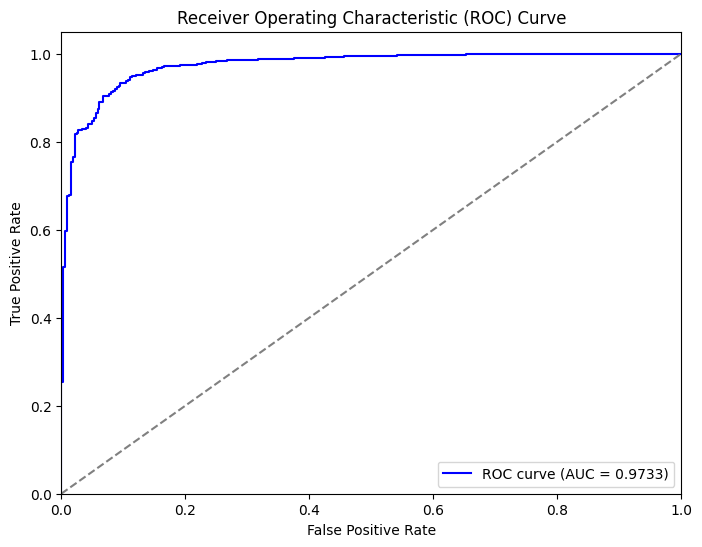

In [617]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = tuned_gbm.predict_proba(X_test2)[:, 1]  # Probability estimates for the positive class

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test1, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The Area Under the Curve (AUC) is excellent, indicating strong model performance in distinguishing between the two classes

### Conclusion on the model building :    
We will select the tuned Gradient Boosting model due to its outstanding and balanced performance metrics.

### **Feature importance**

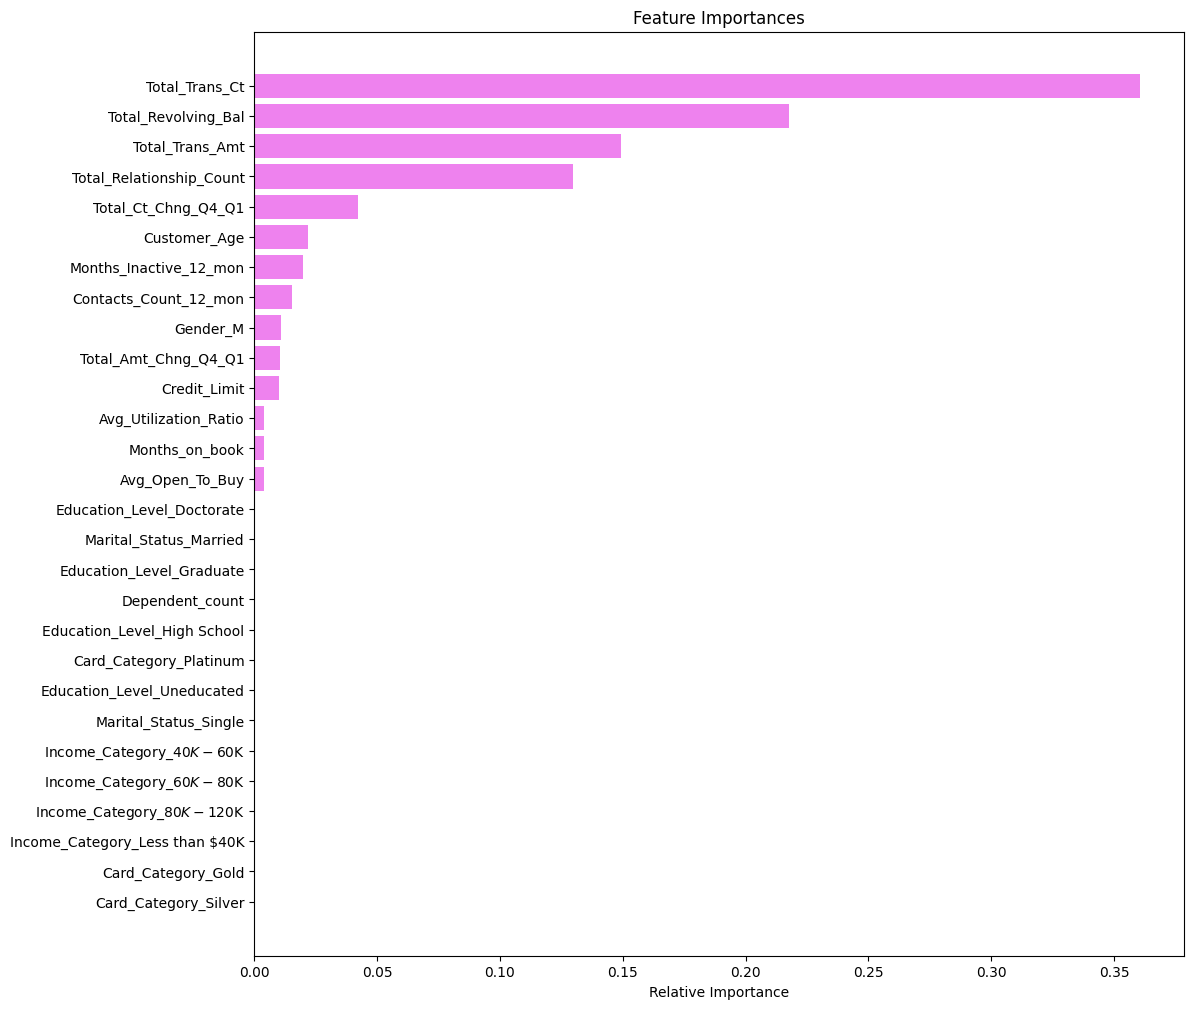

In [613]:
feature_names = X_test2.columns
importances = tuned_gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are total transactions count, total revolving balance, total relationship count, Total_Ct_Chng_Q4_Q1, and customer age. Therefore, the bank should focus on improving services related to these areas.

### **Conclusion**

##Focus on Key Features:

- Total Transaction Count: Offer incentives for higher transaction counts.
- Total Revolving Balance: Provide interest rate reductions for lower balances.
- Total Relationship Count: Promote additional products to increase customer relationships.

## Outlier Management:

- Set thresholds for features like credit limit and transaction amount, and offer personalized advice for customers outside these thresholds.

## Improve Transaction Services:

- Enhance transaction processing times and provide detailed transaction insights.

## Focus on High Churn Indicators:

- Target retention efforts on customers with lower balances, low utilization ratios, graduates, single customers, and those with income extremes.

## Financial Education:

- Provide resources on credit management and financial planning to help customers make better financial decisions.